### **Imports**

In [1]:
import sys, os, warnings
from os import listdir

path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("crest")

from eda_utils import plot_dist_subplots
from eda_utils import plot_subplots
from eda_utils import time_series_subplots
from eda_utils import scatterplot_subplots

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

### **Load Data**

In [2]:
all_paths = []
fol_name = r"C:\Users\angel\Desktop\Data Analysis\Ironhack\Final Bootcamp Project\Smart-Home-Energy-Consumption-Project\data"
for e in os.listdir(fol_name):
    full = os.path.join(fol_name, e)
    if os.path.isfile(full):
        all_paths.append(full)

data = pd.concat(pd.read_csv(f, low_memory=False) for f in all_paths)
display(data.head())

Unnamed: 0                 time       use       gen  dishwasher  \
0           0  2016-01-01 05:00:00  0.932833  0.003483    0.000033   
1           1  2016-01-01 05:01:00  0.934333  0.003467    0.000000   
2           2  2016-01-01 05:02:00  0.931817  0.003467    0.000017   
3           3  2016-01-01 05:03:00  1.022050  0.003483    0.000017   
4           4  2016-01-01 05:04:00  1.139400  0.003467    0.000133   

   home office    fridge  wine cellar  garage door      barn      well  \
0     0.442633  0.124150     0.006983     0.013083  0.031350  0.001017   
1     0.444067  0.124000     0.006983     0.013117  0.031500  0.001017   
2     0.446067  0.123533     0.006983     0.013083  0.031517  0.001000   
3     0.446583  0.123133     0.006983     0.013000  0.031500  0.001017   
4     0.446533  0.122850     0.006850     0.012783  0.031500  0.001017   

   microwave  living room  temperature  humidity  visibility  \
0   0.004067     0.001517        36.14      0.62        10.0   
1   0.004067     0.001650        36.14      0.62        10.0   
2   0.004067     0.001650        36.14      0.62        10.0   
3   0.004067     0.001617        36.14      0.62        10.0   
4   0.004067     0.001583        36.14      0.62        10.0   

   apparenttemperature  pressure  windspeed  cloudcover  windbearing  \
0                29.26   1016.91       9.18        0.75        282.0   
1                29.26   1016.91       9.18        0.75        282.0   
2                29.26   1016.91       9.18        0.75        282.0   
3                29.26   1016.91       9.18        0.75        282.0   
4                29.26   1016.91       9.18        0.75        282.0   

   precipintensity  dewpoint  precipprobability   furnace   kitchen  month  \
0              0.0      24.4                0.0  0.082617  0.000567      1   
1              0.0      24.4                0.0  0.084533  0.000567      1   
2              0.0      24.4                0.0  0.083017  0.000617      1   
3              0.0      24.4                0.0  0.175417  0.000650      1   
4              0.0      24.4                0.0  0.300917  0.000783      1   

   day weekday  hour  minute  
0    1  Friday     5       0  
1    1  Friday     5       1  
2    1  Friday     5       2  
3    1  Friday     5       3  
4    1  Friday     5       4

In [3]:
# Setting the time column as index and creating some usefull variables to simplify exploration

data["time"] = pd.to_datetime(data["time"])
data = data.set_index('time').drop(columns="Unnamed: 0", axis=1)

energy_cols = list(data.columns[:11]) + list(data.columns[22:24])
meteo_cols = list(data.columns[11:22])
time_cols = list(data.columns[-5:])

energy_df = pd.DataFrame(data[energy_cols])
meteo_df = data[meteo_cols]

data.head()

use       gen  dishwasher  home office    fridge  \
time                                                                         
2016-01-01 05:00:00  0.932833  0.003483    0.000033     0.442633  0.124150   
2016-01-01 05:01:00  0.934333  0.003467    0.000000     0.444067  0.124000   
2016-01-01 05:02:00  0.931817  0.003467    0.000017     0.446067  0.123533   
2016-01-01 05:03:00  1.022050  0.003483    0.000017     0.446583  0.123133   
2016-01-01 05:04:00  1.139400  0.003467    0.000133     0.446533  0.122850   

                     wine cellar  garage door      barn      well  microwave  \
time                                                                           
2016-01-01 05:00:00     0.006983     0.013083  0.031350  0.001017   0.004067   
2016-01-01 05:01:00     0.006983     0.013117  0.031500  0.001017   0.004067   
2016-01-01 05:02:00     0.006983     0.013083  0.031517  0.001000   0.004067   
2016-01-01 05:03:00     0.006983     0.013000  0.031500  0.001017   0.004067   
2016-01-01 05:04:00     0.006850     0.012783  0.031500  0.001017   0.004067   

                     living room  temperature  humidity  visibility  \
time                                                                  
2016-01-01 05:00:00     0.001517        36.14      0.62        10.0   
2016-01-01 05:01:00     0.001650        36.14      0.62        10.0   
2016-01-01 05:02:00     0.001650        36.14      0.62        10.0   
2016-01-01 05:03:00     0.001617        36.14      0.62        10.0   
2016-01-01 05:04:00     0.001583        36.14      0.62        10.0   

                     apparenttemperature  pressure  windspeed  cloudcover  \
time                                                                        
2016-01-01 05:00:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:01:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:02:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:03:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:04:00                29.26   1016.91       9.18        0.75   

                     windbearing  precipintensity  dewpoint  \
time                                                          
2016-01-01 05:00:00        282.0              0.0      24.4   
2016-01-01 05:01:00        282.0              0.0      24.4   
2016-01-01 05:02:00        282.0              0.0      24.4   
2016-01-01 05:03:00        282.0              0.0      24.4   
2016-01-01 05:04:00        282.0              0.0      24.4   

                     precipprobability   furnace   kitchen  month  day  \
time                                                                     
2016-01-01 05:00:00                0.0  0.082617  0.000567      1    1   
2016-01-01 05:01:00                0.0  0.084533  0.000567      1    1   
2016-01-01 05:02:00                0.0  0.083017  0.000617      1    1   
2016-01-01 05:03:00                0.0  0.175417  0.000650      1    1   
2016-01-01 05:04:00                0.0  0.300917  0.000783      1    1   

                    weekday  hour  minute  
time                                       
2016-01-01 05:00:00  Friday     5       0  
2016-01-01 05:01:00  Friday     5       1  
2016-01-01 05:02:00  Friday     5       2  
2016-01-01 05:03:00  Friday     5       3  
2016-01-01 05:04:00  Friday     5       4

### **Univariate Analysis** - Energy

In [4]:
data.describe()

use            gen     dishwasher    home office  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.858962       0.076229       0.031368       0.081287   
std         1.058207       0.128428       0.190951       0.104466   
min         0.000000       0.000000       0.000000       0.000083   
25%         0.367667       0.003367       0.000000       0.040383   
50%         0.562333       0.004283       0.000017       0.042217   
75%         0.970250       0.083917       0.000233       0.068283   
max        14.714567       0.613883       1.401767       0.971750   

              fridge    wine cellar    garage door           barn  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.063556       0.042137       0.014139       0.058530   
std         0.076199       0.057967       0.014292       0.202706   
min         0.000067       0.000017       0.000017       0.000000   
25%         0.005083       0.007133       0.012733       0.029833   
50%         0.005433       0.008083       0.012933       0.031317   
75%         0.125417       0.053192       0.013100       0.032883   
max         0.851267       1.273933       1.088983       7.027900   

                well      microwave    living room    temperature  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.015642       0.010983       0.035313      50.741935   
std         0.137841       0.098859       0.096056      19.113807   
min         0.000000       0.000000       0.000000     -12.640000   
25%         0.000983       0.003617       0.001483      35.770000   
50%         0.001000       0.004000       0.001617      50.320000   
75%         0.001017       0.004067       0.001750      66.260000   
max         1.633017       1.929800       0.465217      93.720000   

            humidity     visibility  apparenttemperature       pressure  \
count  503910.000000  503910.000000        503910.000000  503910.000000   
mean        0.664085       9.253444            48.263382    1016.301625   
std         0.194389       1.611186            22.027916       7.895185   
min         0.130000       0.270000           -32.080000     986.400000   
25%         0.510000       9.420000            31.090000    1011.290000   
50%         0.680000      10.000000            50.320000    1016.530000   
75%         0.840000      10.000000            66.260000    1021.480000   
max         0.980000      10.000000           101.120000    1042.460000   

           windspeed     cloudcover    windbearing  precipintensity  \
count  503910.000000  503910.000000  503910.000000    503910.000000   
mean        6.649936       0.225945     202.356843         0.002598   
std         3.982716       0.289945     106.520474         0.011257   
min         0.000000       0.000000       0.000000         0.000000   
25%         3.660000       0.040000     148.000000         0.000000   
50%         5.930000       0.120000     208.000000         0.000000   
75%         8.940000       0.290000     295.000000         0.000000   
max        22.910000       1.000000     359.000000         0.191000   

            dewpoint  precipprobability        furnace        kitchen  \
count  503910.000000      503910.000000  503910.000000  503910.000000   
mean       38.694013           0.056453       0.235989       0.009788   
std        19.087939           0.165836       0.273885       0.079883   
min       -27.240000           0.000000       0.000300       0.000000   
25%        24.600000           0.000000       0.085300       0.000600   
50%        39.030000           0.000000       0.088950       0.000750   
75%        54.790000           0.000000       0.219417       0.000850   
max        75.490000           0.840000       2.472633       2.265867   

               month            day           hour         minute  
count  503910.000000  503910.000000  503910.000000  503910.000000  
mean        6.268381      15.411681      

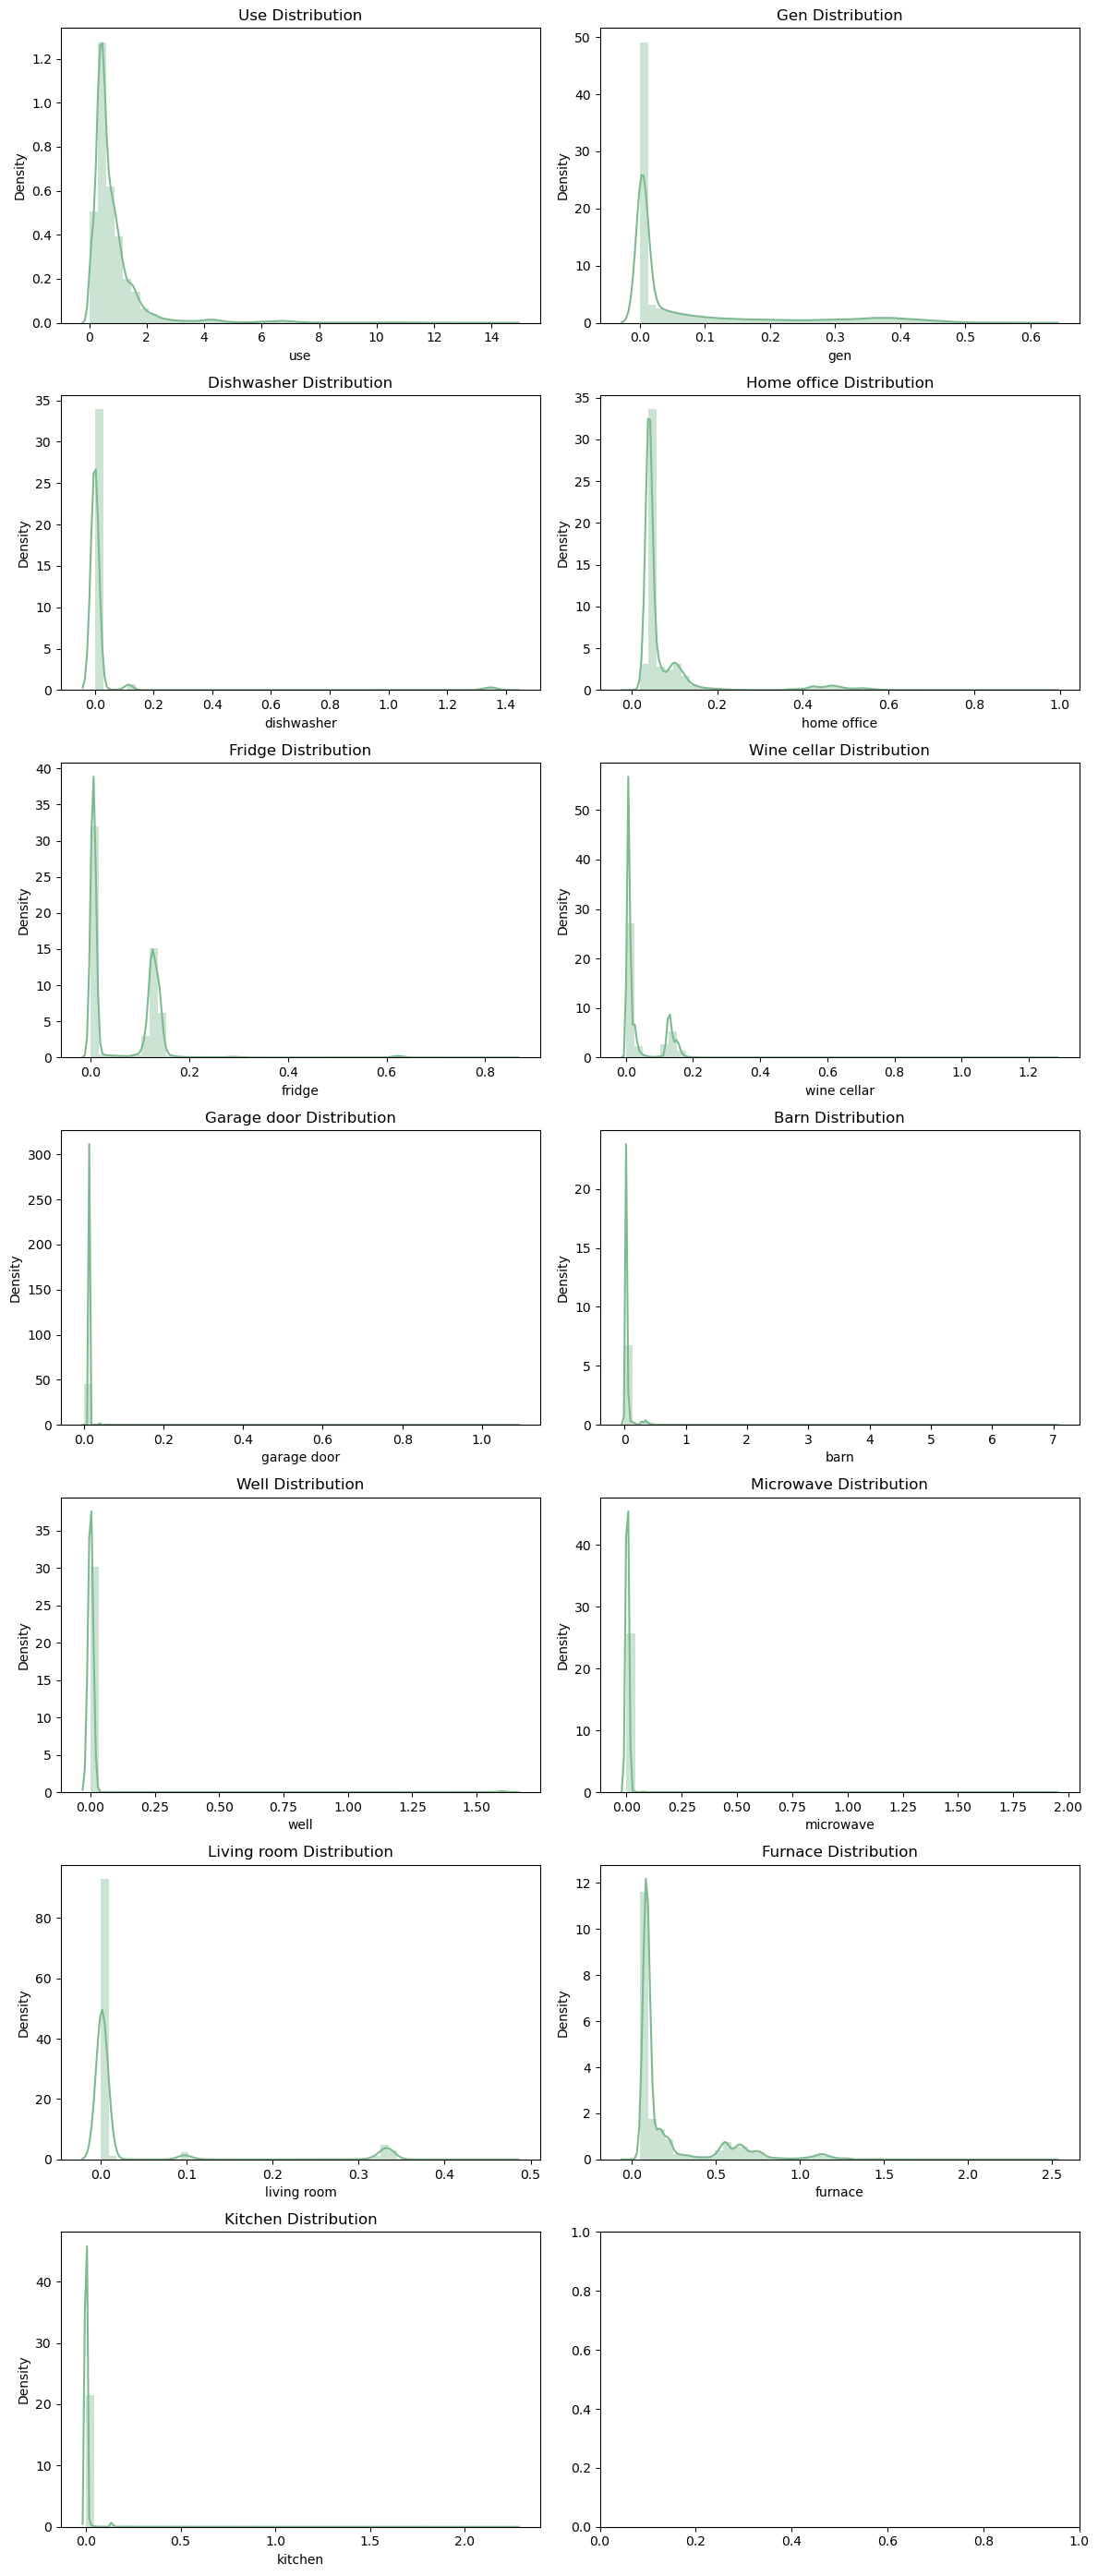

In [5]:
plot_dist_subplots(data,energy_cols)

> ##### **Observations**
>
> * There appear to be outliers present in general energy usage and energy generation, as well as in all individual devices. This suggests that devices may respond to occasional patterns rather than exhibiting continuous energy consumption. For certain individual appliances, these outliers may represent different modes of usage or various situations in which a particular device consumes more energy.
> * Changes in energy generation appear to be more gradual and stable compared to fluctuations in usage.
>
> ##### **Impact**
> * My hypothesis is that, since the patterns of usage seem to be event-based, values considered outliers will have a significant impact on overall consumption. Therefore, I will examine the correlation of these outlier values with the overall consumption.
> 
>

In [5]:
use_outliers = energy_df[energy_df["use"] >= 1.5].sort_values("use", ascending=False) #I defined the upper threshold by q3 + 1.5 x IQR
use_outliers

use       gen  dishwasher  home office    fridge  \
time                                                                          
2016-07-30 21:04:00  14.714567  0.074300    0.000467     0.094717  0.116250   
2016-07-25 20:03:00  13.957750  0.030033    0.000067     0.074817  0.165217   
2016-07-25 20:02:00  13.726550  0.029700    0.000067     0.064267  0.144750   
2016-07-25 20:01:00  13.718633  0.029467    0.000017     0.062767  0.144983   
2016-08-13 18:05:00  13.650800  0.003217    0.000150     0.037183  0.113567   
...                        ...       ...         ...          ...       ...   
2016-09-24 05:19:00   1.500067  0.004367    0.606917     0.042183  0.136867   
2016-05-08 00:32:00   1.500067  0.003450    0.000017     0.454800  0.620200   
2016-03-29 00:11:00   1.500050  0.003250    0.000017     0.420100  0.112167   
2016-02-10 20:34:00   1.500033  0.000983    0.000050     0.039883  0.005083   
2016-04-27 13:04:00   1.500000  0.291117    1.370250     0.039900  0.137933   

                     wine cellar  garage door      barn      well  microwave  \
time                                                                           
2016-07-30 21:04:00     0.128750     0.014783  5.706050  0.002350   0.003900   
2016-07-25 20:03:00     0.017117     0.014483  0.027950  0.001650   0.003667   
2016-07-25 20:02:00     0.016967     0.014483  0.028167  0.001733   0.003700   
2016-07-25 20:01:00     0.016650     0.014650  0.028033  0.001667   0.003733   
2016-08-13 18:05:00     0.143750     0.014217  0.026600  1.551233   0.003750   
...                          ...          ...       ...       ...        ...   
2016-09-24 05:19:00     0.133433     0.012317  0.032550  0.001000   0.003450   
2016-05-08 00:32:00     0.006817     0.012917  0.030733  0.001017   0.004167   
2016-03-29 00:11:00     0.138217     0.012617  0.138800  0.001150   0.004017   
2016-02-10 20:34:00     0.007017     0.012850  0.031550  0.000983   0.003983   
2016-04-27 13:04:00     0.006317     0.011700  0.031133  0.001017   0.004150   

                     living room   furnace   kitchen  
time                                                  
2016-07-30 21:04:00     0.089917  0.765983  0.000483  
2016-07-25 20:03:00     0.002017  1.287667  0.000283  
2016-07-25 20:02:00     0.002083  1.287883  0.000350  
2016-07-25 20:01:00     0.001833  1.135433  0.000483  
2016-08-13 18:05:00     0.315600  1.391867  0.000633  
...                          ...       ...       ...  
2016-09-24 05:19:00     0.001717  0.086550  0.001100  
2016-05-08 00:32:00     0.001667  0.084233  0.000867  
2016-03-29 00:11:00     0.001733  0.175617  0.000717  
2016-02-10 20:34:00     0.001433  1.163183  0.000667  
2016-04-27 13:04:00     0.001633  0.093617  0.001517  

[56946 rows x 13 columns]

> It appears that the total energy usage does not match the sum of the consumption from individual devices. This disparity likely stems from the consumption of non-smart devices in the household. However, this difference appears to be highly significant in generating outliers. I will plot the difference to assess its relationship with outliers, the sum of device consumption, and total usage.

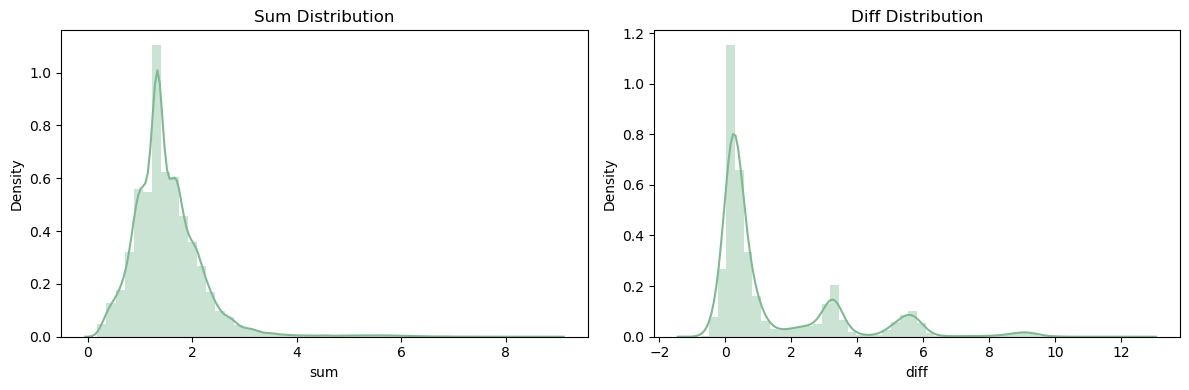

Correlation of Sum of Outliers with Total Use:  0.08049100030826722
Correlation of Difference with Total Use:  0.9422550330642281


In [6]:
use_outliers["sum"] = use_outliers[list(use_outliers.columns[2:])].sum(axis=1)
use_outliers["diff"] = use_outliers["use"] - use_outliers["sum"]

plot_dist_subplots(use_outliers, use_outliers.columns[-2:])

print("Correlation of Sum of Outliers with Total Use: ", use_outliers["sum"].corr(data["use"]))
print("Correlation of Difference with Total Use: ", use_outliers["diff"].corr(data["use"])) 

> ##### **Observations**
>
> * The discrepancy between the total energy and the sum of individual device consumption appears to be highly effective in predicting total energy consumption. Furthermore, the similarity in distribution shapes between the outlier difference and the total usage suggests the significant impact of the difference variable on outlier values.
> * There is a low correlation between the sum of device outliers and total energy usage, indicating that outliers in individual devices do not have a substantial impact on total usage.
>
> ##### **Impact**
> * Although there is a significant correlation between this difference and total energy consumption, we cannot use it as a predictor in our model due to data leakage.
> * I will create a binary variable for outliers to examine later the importance of being an outlier in relation to total usage.
> * I will investigate if the correlation between the difference of the entire dataset is comparable to the correlation within the outliers dataset.


In [7]:
data["gen_outlier"] = 0
data["use_outlier"] = 0
data.loc[data["gen"] > 0.08, "gen_outlier"] = 1
data.loc[data["use"] > 1.5, "use_outlier"] = 1
data["sum"] = energy_df[list(energy_df.columns[2:])].sum(axis=1)
data["use_diff"] = data["use"] - data["sum"]

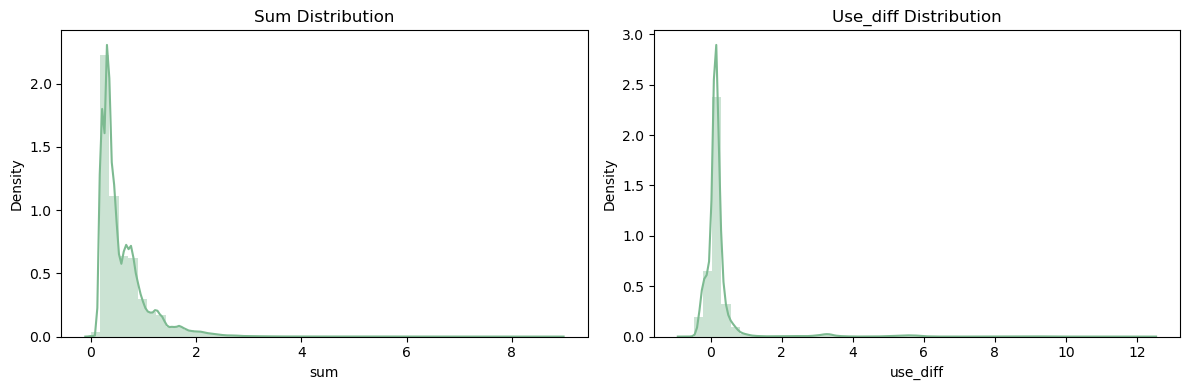

<Axes: >

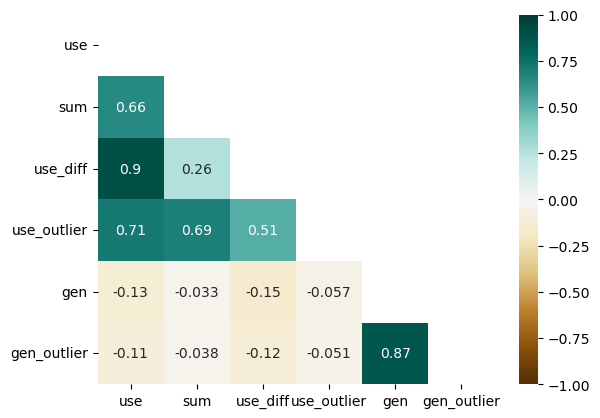

In [8]:
plot_dist_subplots(data, data.columns[-2:])

mask = np.triu(np.ones_like(data[["use", "sum", "use_diff","use_outlier","gen", "gen_outlier"]].corr(), dtype=bool))
sns.heatmap(data[["use", "sum", "use_diff","use_outlier","gen", "gen_outlier"]].corr(), annot=True, mask=mask, vmin=-1,vmax=1, cmap="BrBG")

> ##### **Observations**
> 
> * The difference between total usage and the sum of individual devices appears to have the strongest correlation with overall usage. However, as mentioned earlier, we cannot utilize this variable as a predictor for our model due to data leakage. Nonetheless, the correlation with the difference in the outliers dataset seems to be slightly higher, which supports my hypothesis.
> * There is a weak correlation between the sum of device usage and the usage difference, suggesting that while they may coincide at times, they represent distinct phenomena.

### **Univariate Analysis** - Weather

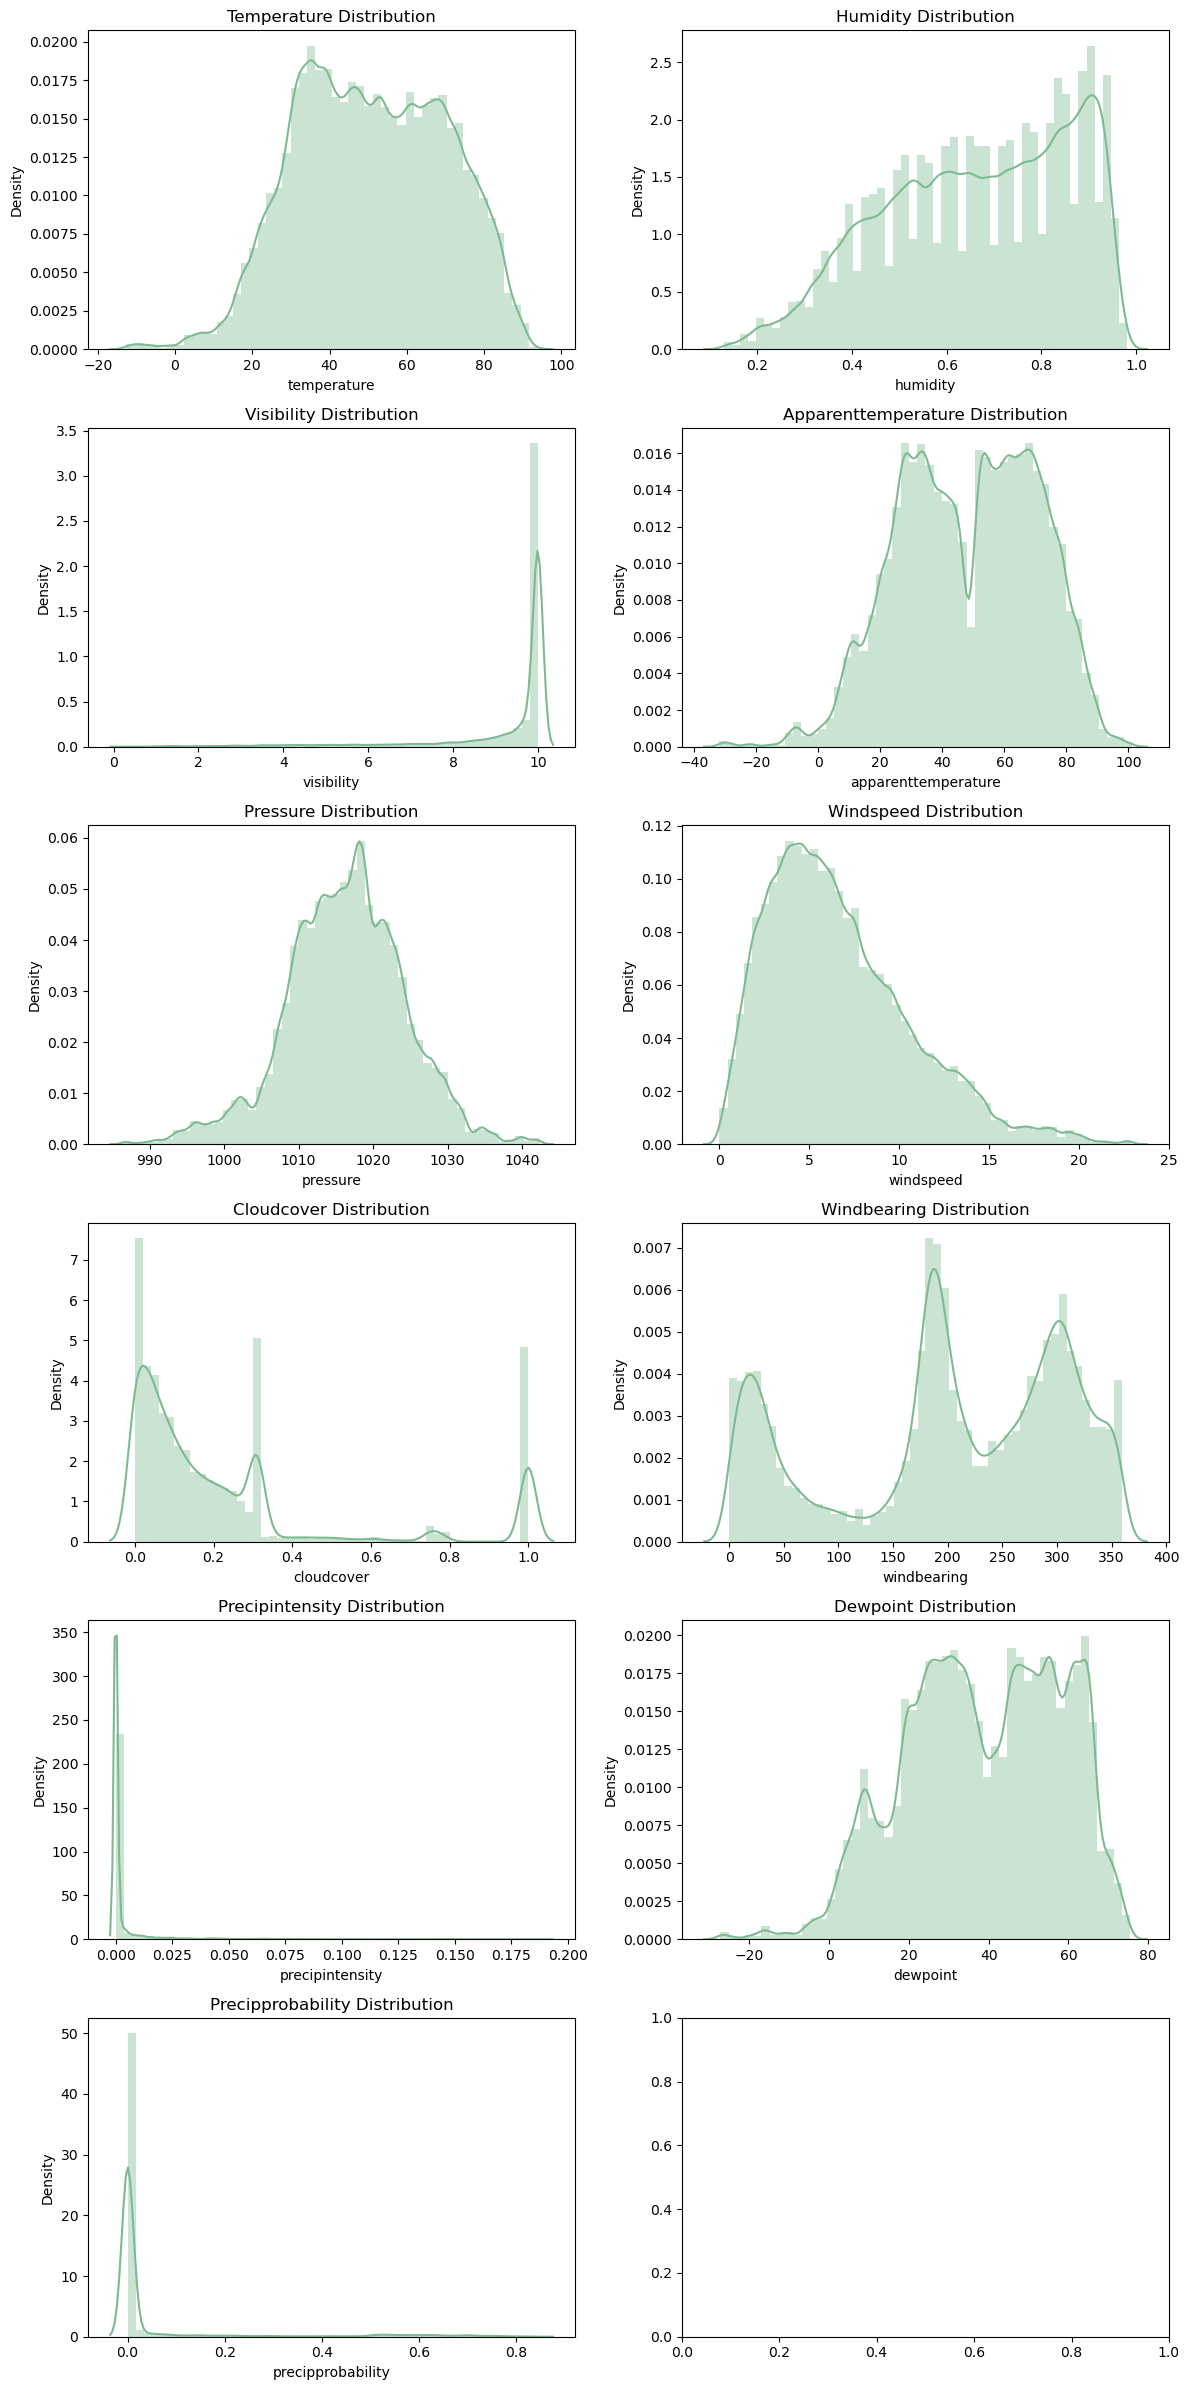

In [10]:
plot_dist_subplots(data, meteo_cols)

> ##### **Observations**
> 
> * The distributions of the weather column are not standard. As I will be using autoregressive models, I will refrain from normalizing them at this stage.

### **Multivariate Analisys** - Correlations

<Axes: >

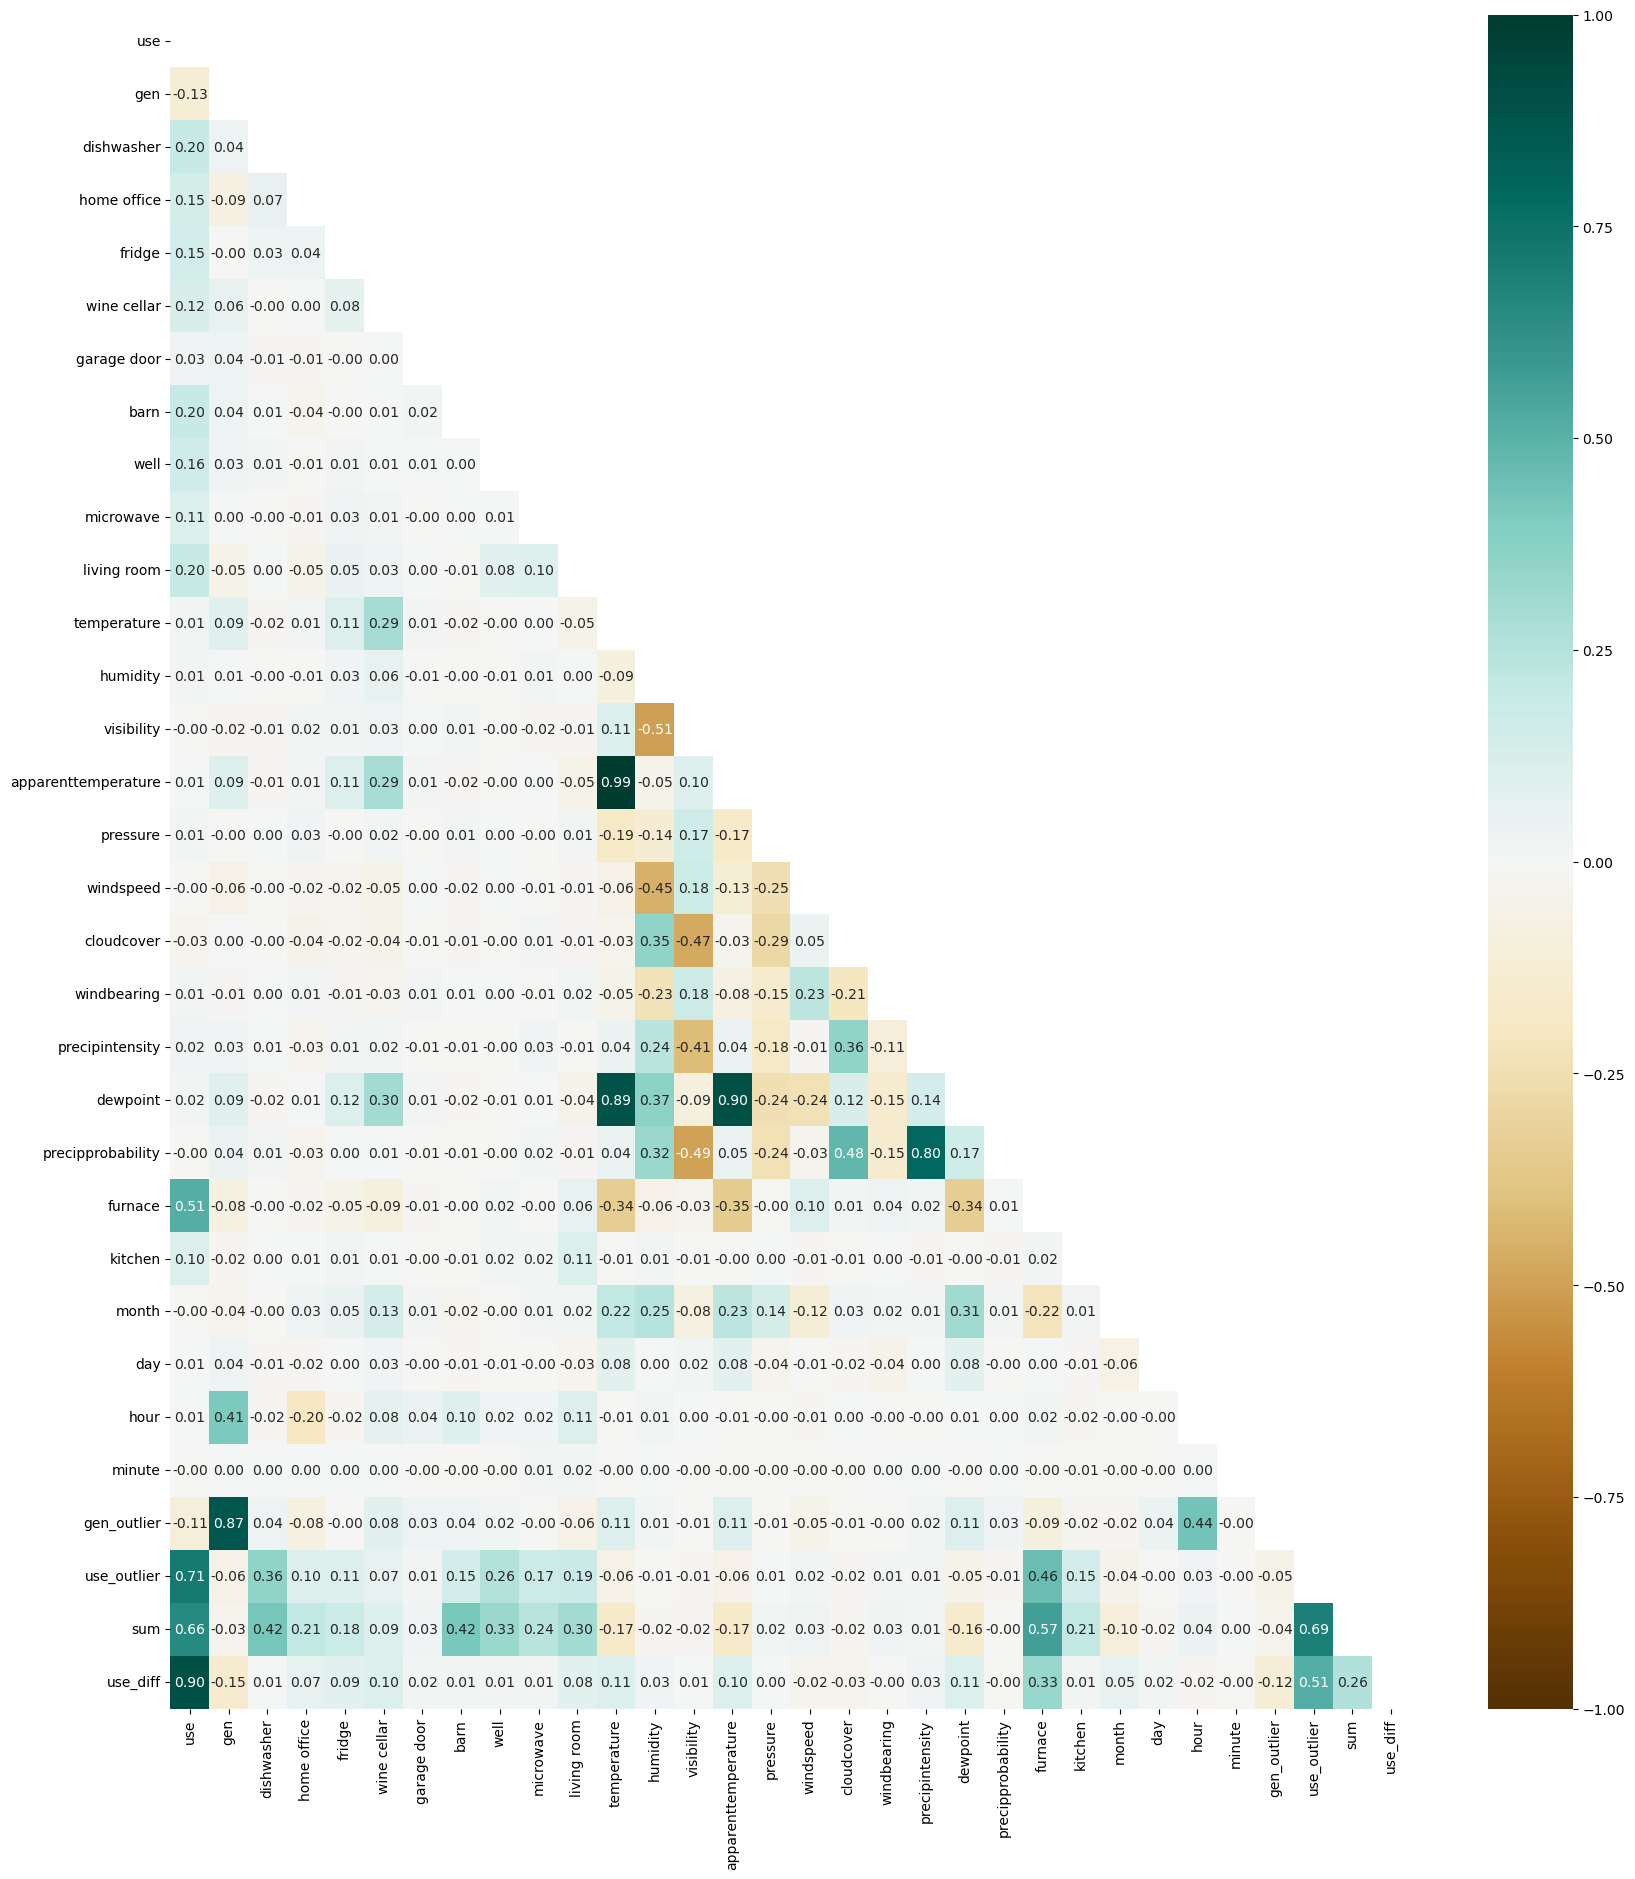

In [12]:
plt.figure(figsize=(20,22))

mask_2 = np.triu(np.ones_like(data.select_dtypes("number").corr(), dtype=bool))
sns.heatmap(data.select_dtypes("number").corr(), annot=True, vmax=1, vmin=-1, center=0,mask=mask_2, fmt="0.2f", cmap="BrBG")

### Zooming in...

##### *Total Energy Consumption Scatterplots*

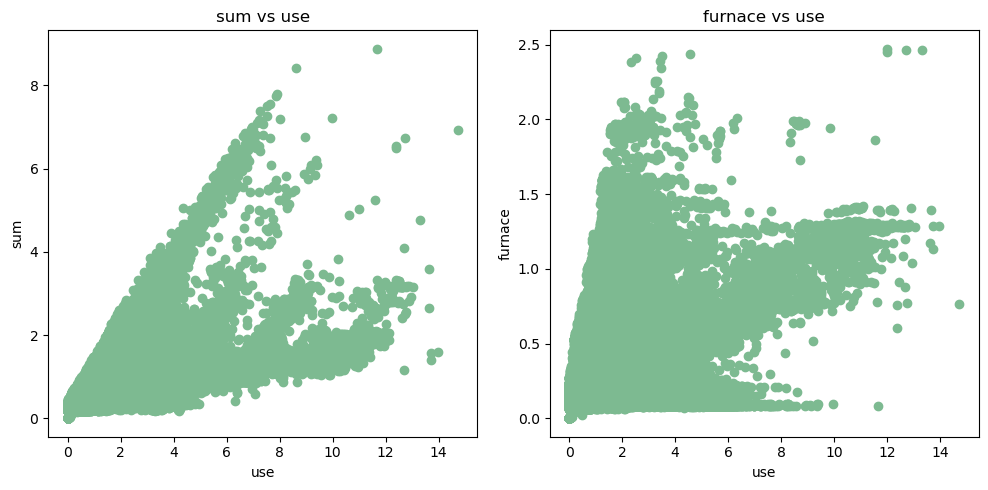

In [19]:
scatterplot_subplots("use", ["sum", "furnace"], data)

##### *Outliers Scatterplots*

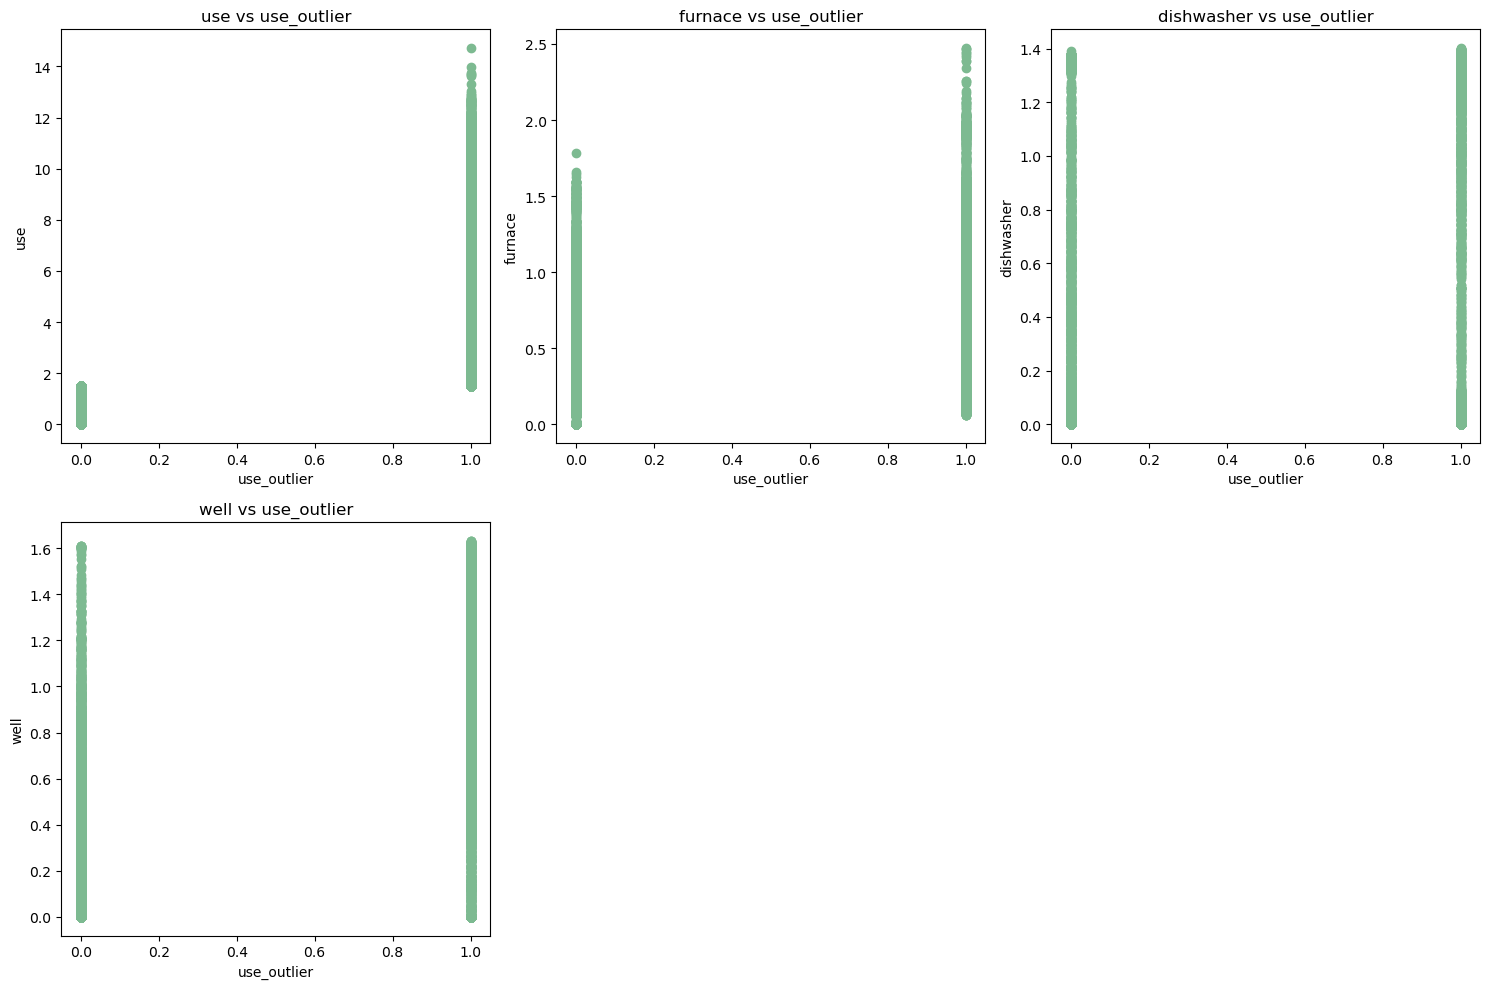

In [20]:
scatterplot_subplots("use_outlier", ["use", "furnace", "dishwasher", "well"], data)

##### *Temperature Scatterplots*

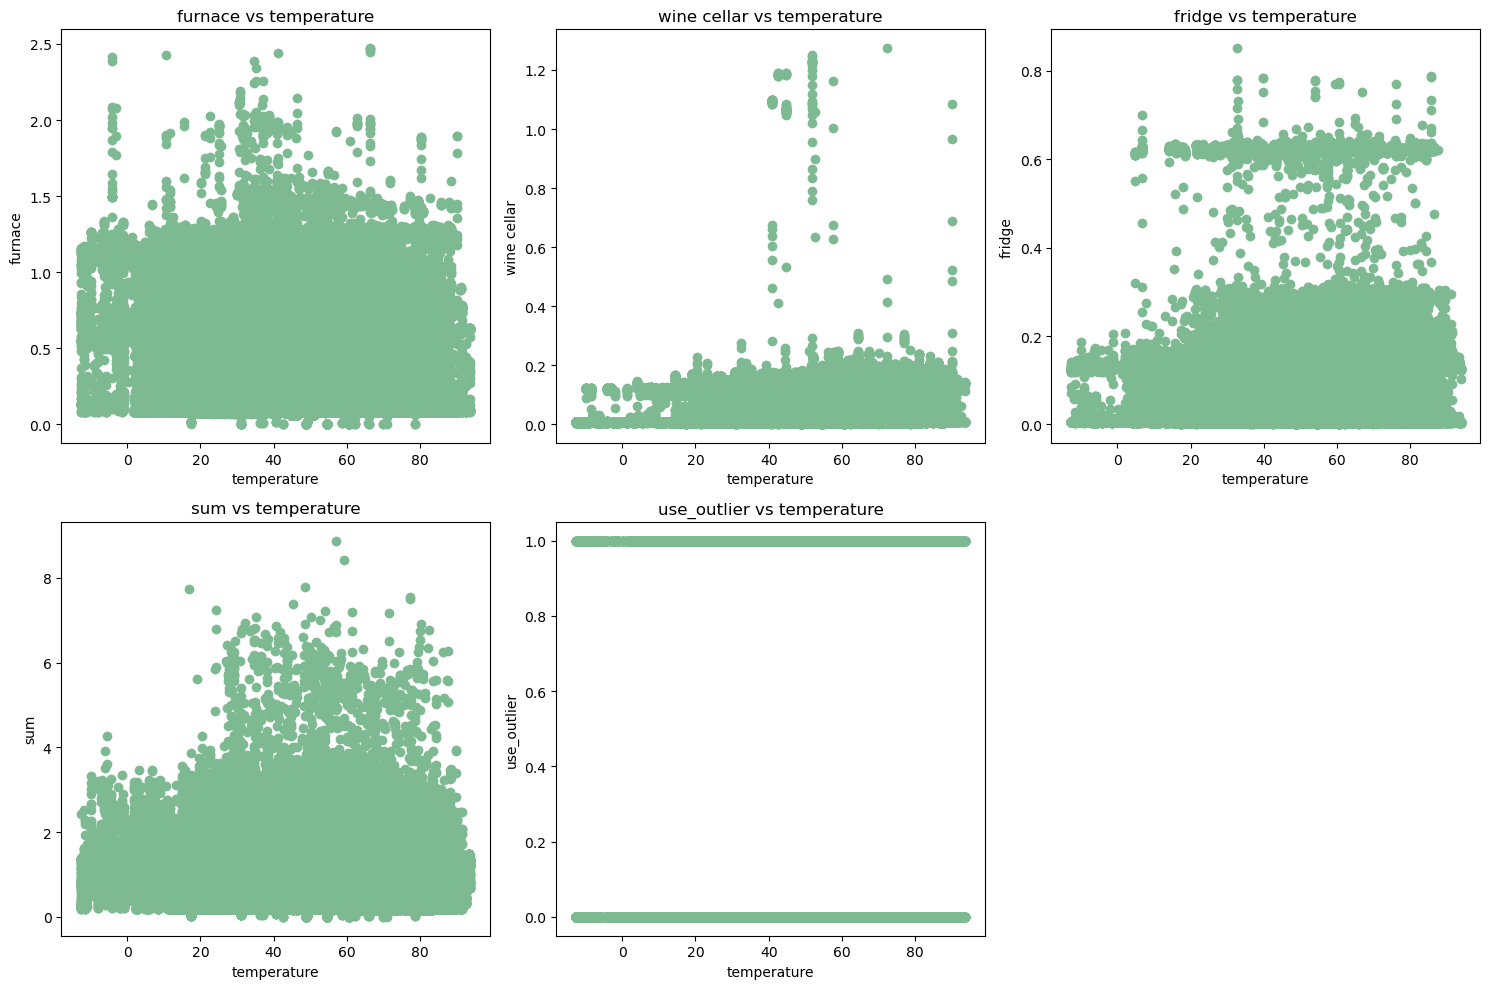

In [18]:
scatterplot_subplots("temperature", ["furnace", "wine cellar", "fridge", "sum", "use_outlier"], data)

> ##### **Observations**
> 
> *Time:*
> * Consumption patterns exhibit no significant correlations with day or minute variables, though certain home applications show slight correlations with specific times of the day. This suggests that consumption patterns may be influenced more by seasonality factors, events, or daily routines rather than time of day.
> 
> *Energy:*
> * Furnace usage demonstrates a notable correlation with overall energy consumption, while the garage door consumes relatively less energy.
> * Furnace, dishwasher, and well show slight associations with outliers. Additionally, furnace, dishwasher, and barn (the device with the highest outliers) show correlations with total consumption, reinforcing the relationship between consumption spikes and total energy usage.
> * The difference between energy used by smart devices and total energy consumption does not appear strongly correlated with any individual device.
> * A slight correlation is observed between energy generation and refrigeration devices, while an inverse correlation exists between generation and furnace usage, indicating a relationship with weather and temperature-related devices. 
> 
> *Weather:*
> * Apparent temperature closely aligns with actual temperature. Moreover, dew point strongly correlates with temperature, offering further insights into humidity, pressure, and wind conditions.
> 
> *Intersegments:*
> * Monthly variations align with expected meteorological patterns.
> * Furnace, wine cellar, and to a lesser extent, the fridge, exhibit slight correlations with temperature-related variables, which is logical.
> * There is no strong correlation observed between general energy consumption and time/weather variables.

### **Multivariate Analysis** - Time Series

In [12]:
added_cols = list(data.columns[-4:]) #Create a new object for plotting purposes

##### *Energy Columns*

---------------------- DAILY ----------------------------


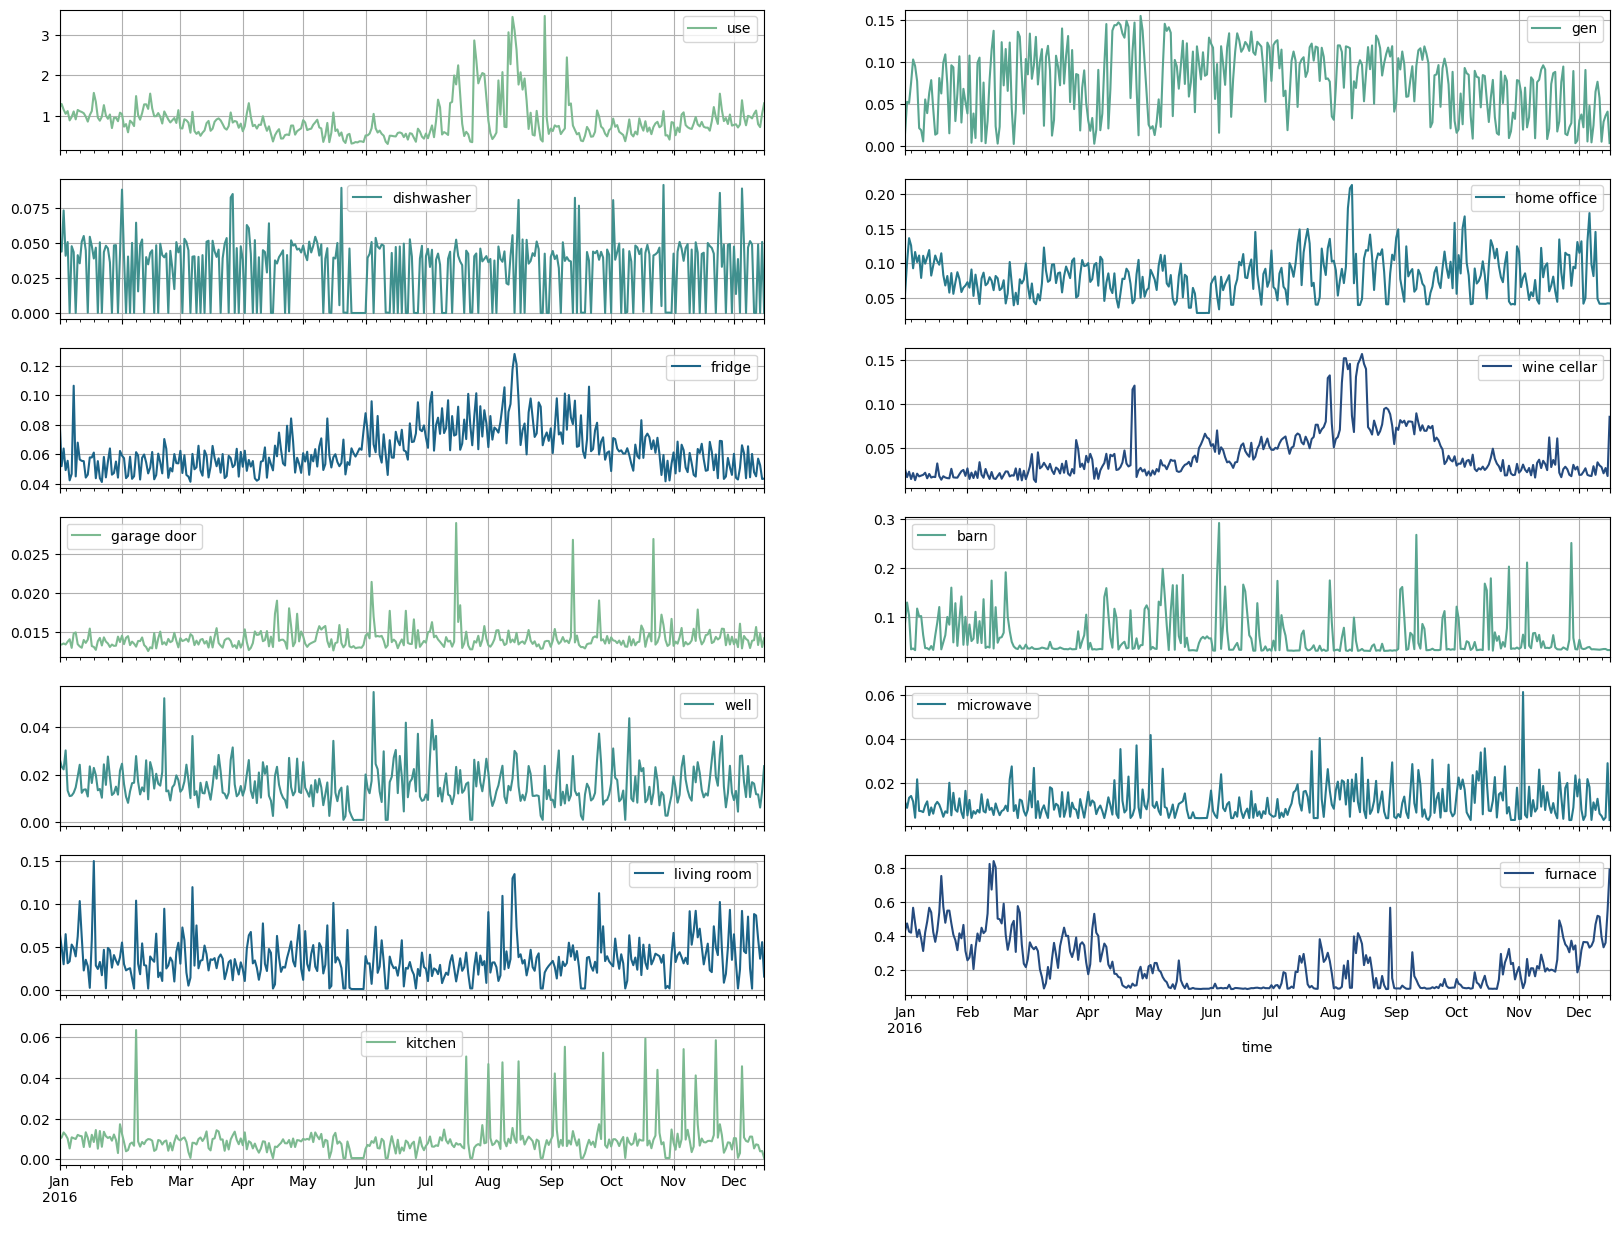

---------------------- WEEKLY ----------------------------


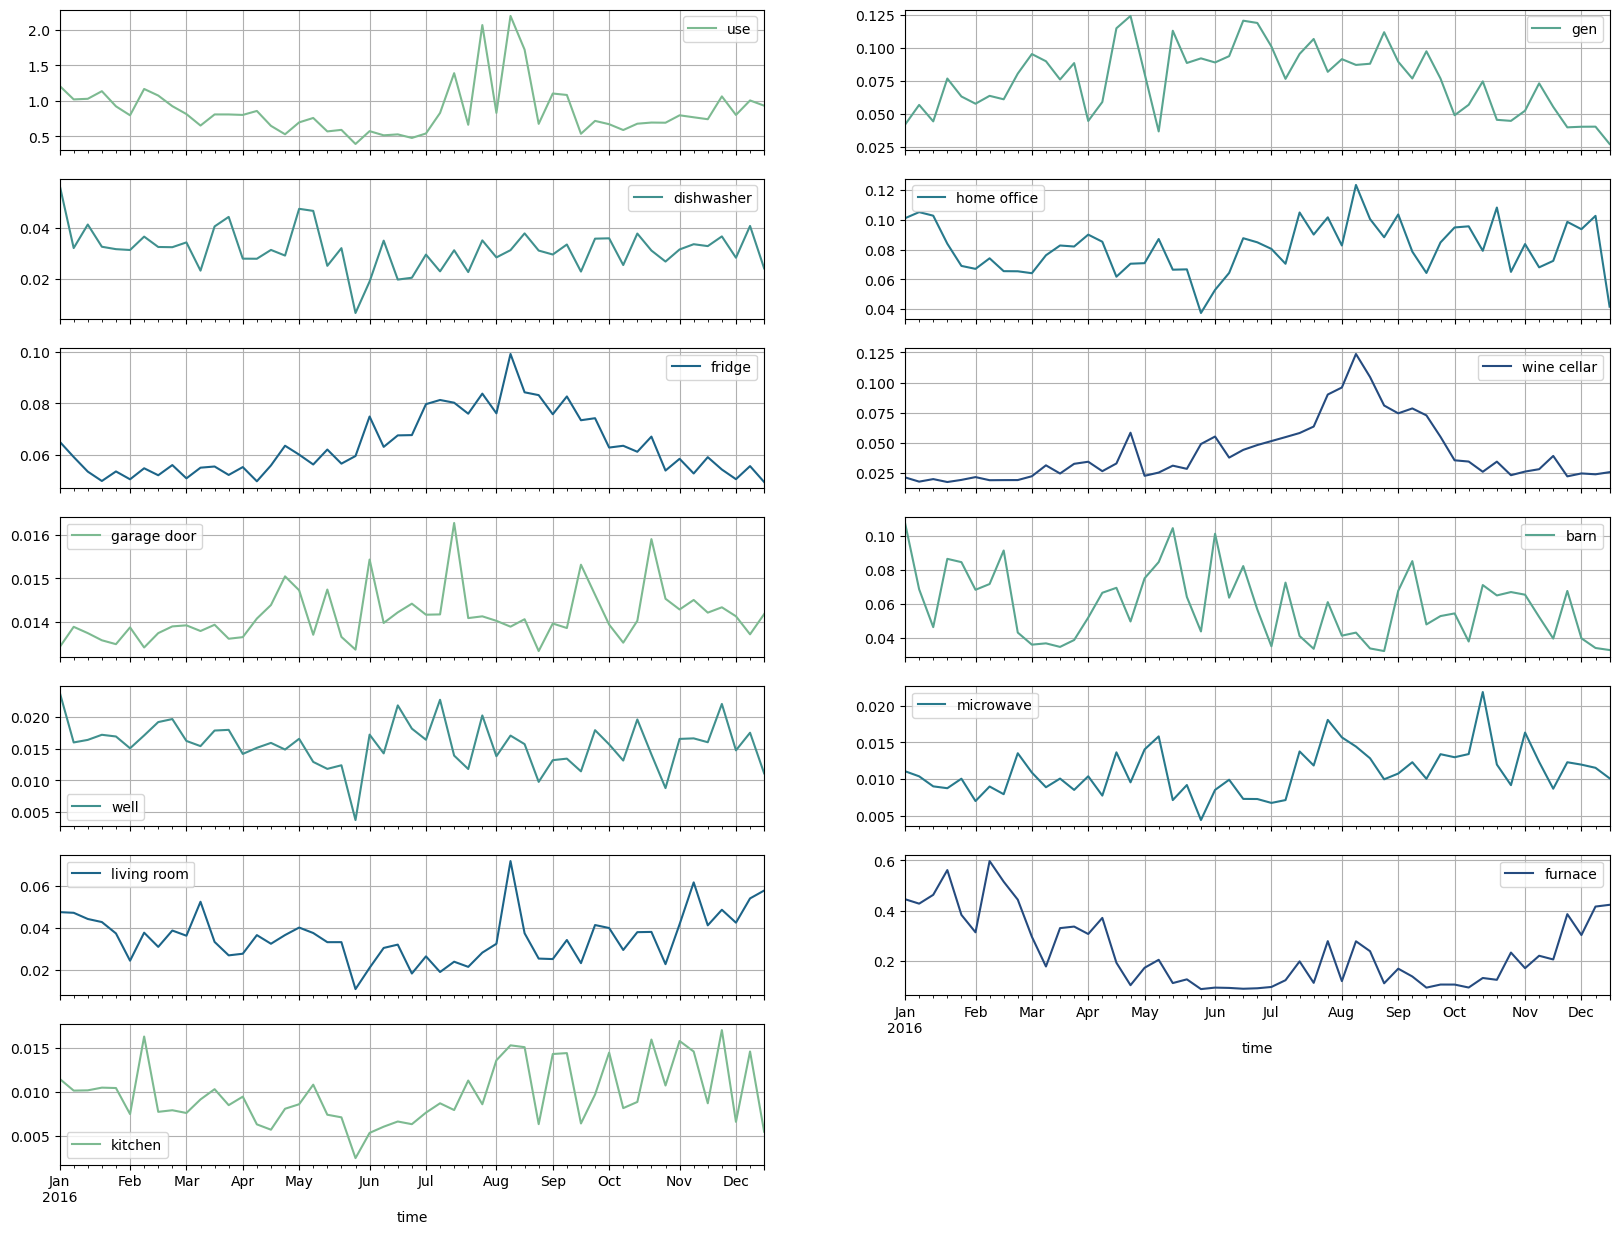

---------------------- MONTHLY ----------------------------


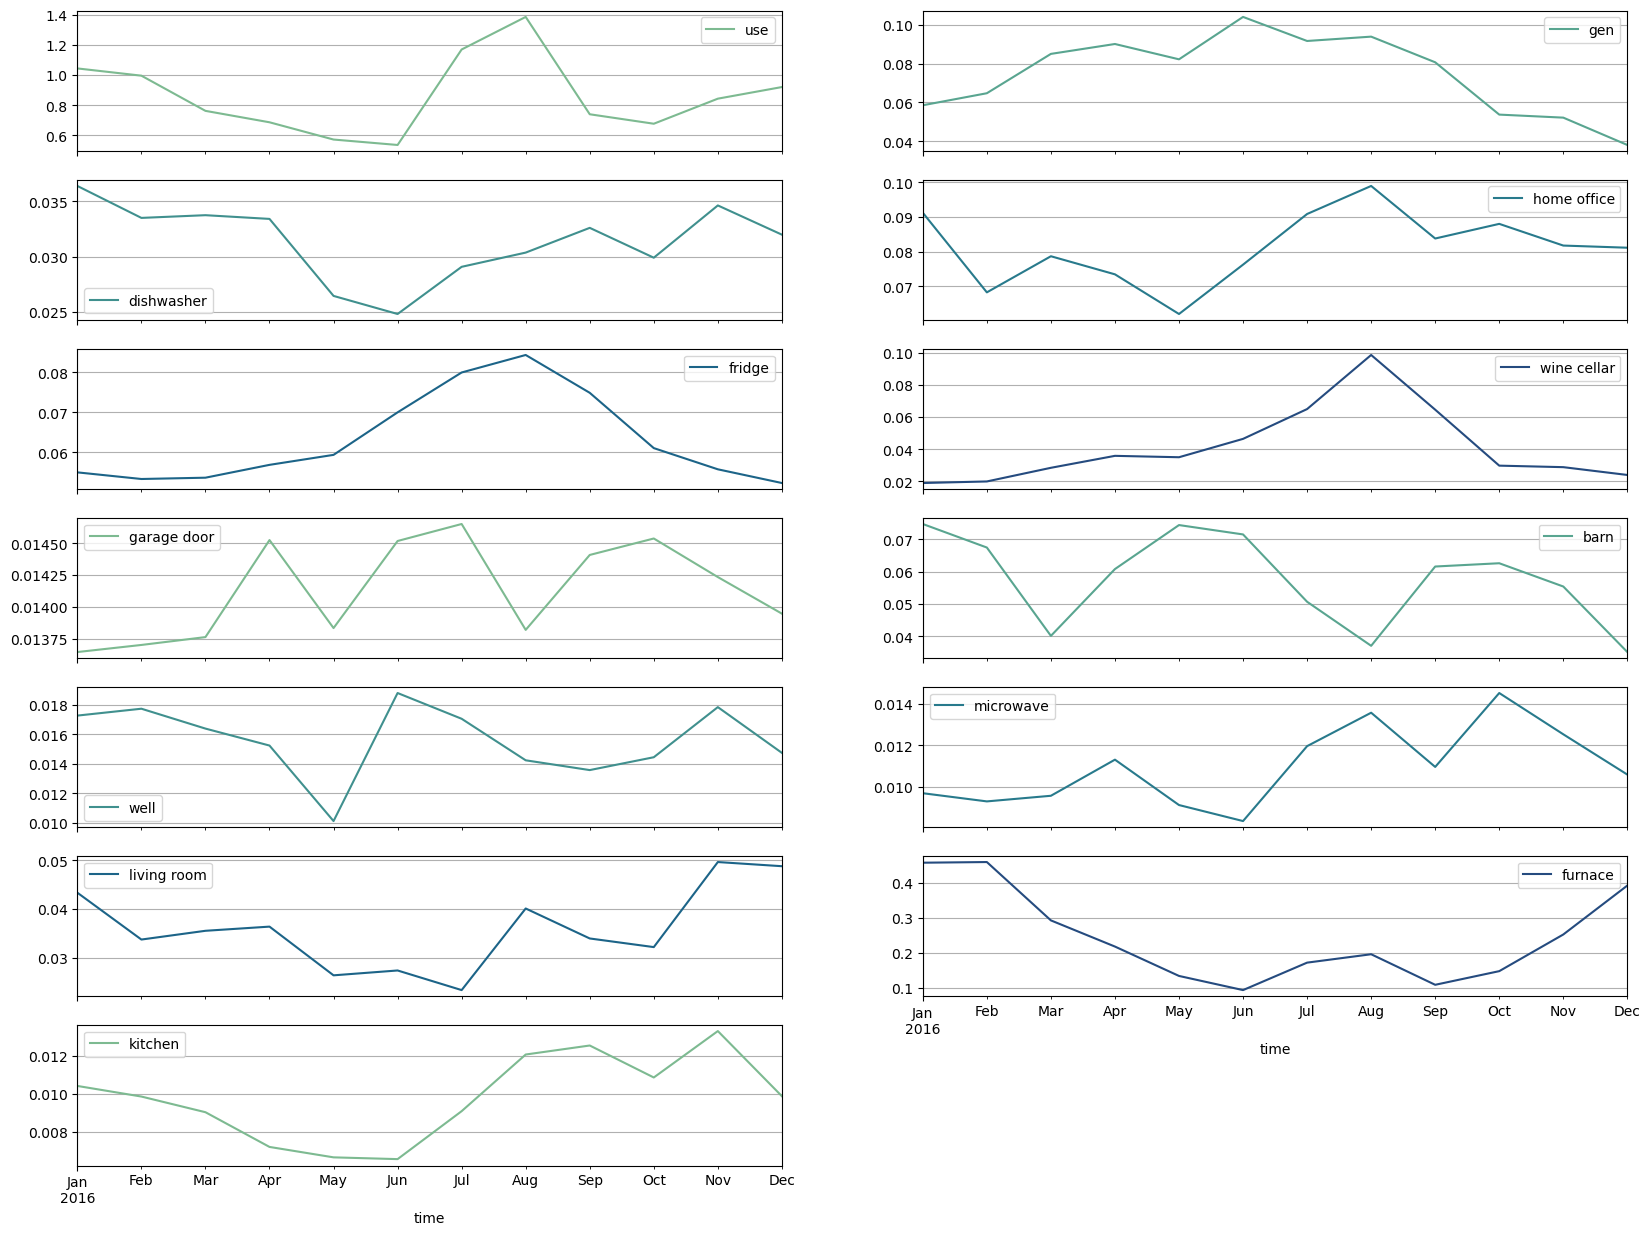

In [13]:
time_series_subplots(data,energy_cols)

##### *Added Columns*

---------------------- DAILY ----------------------------


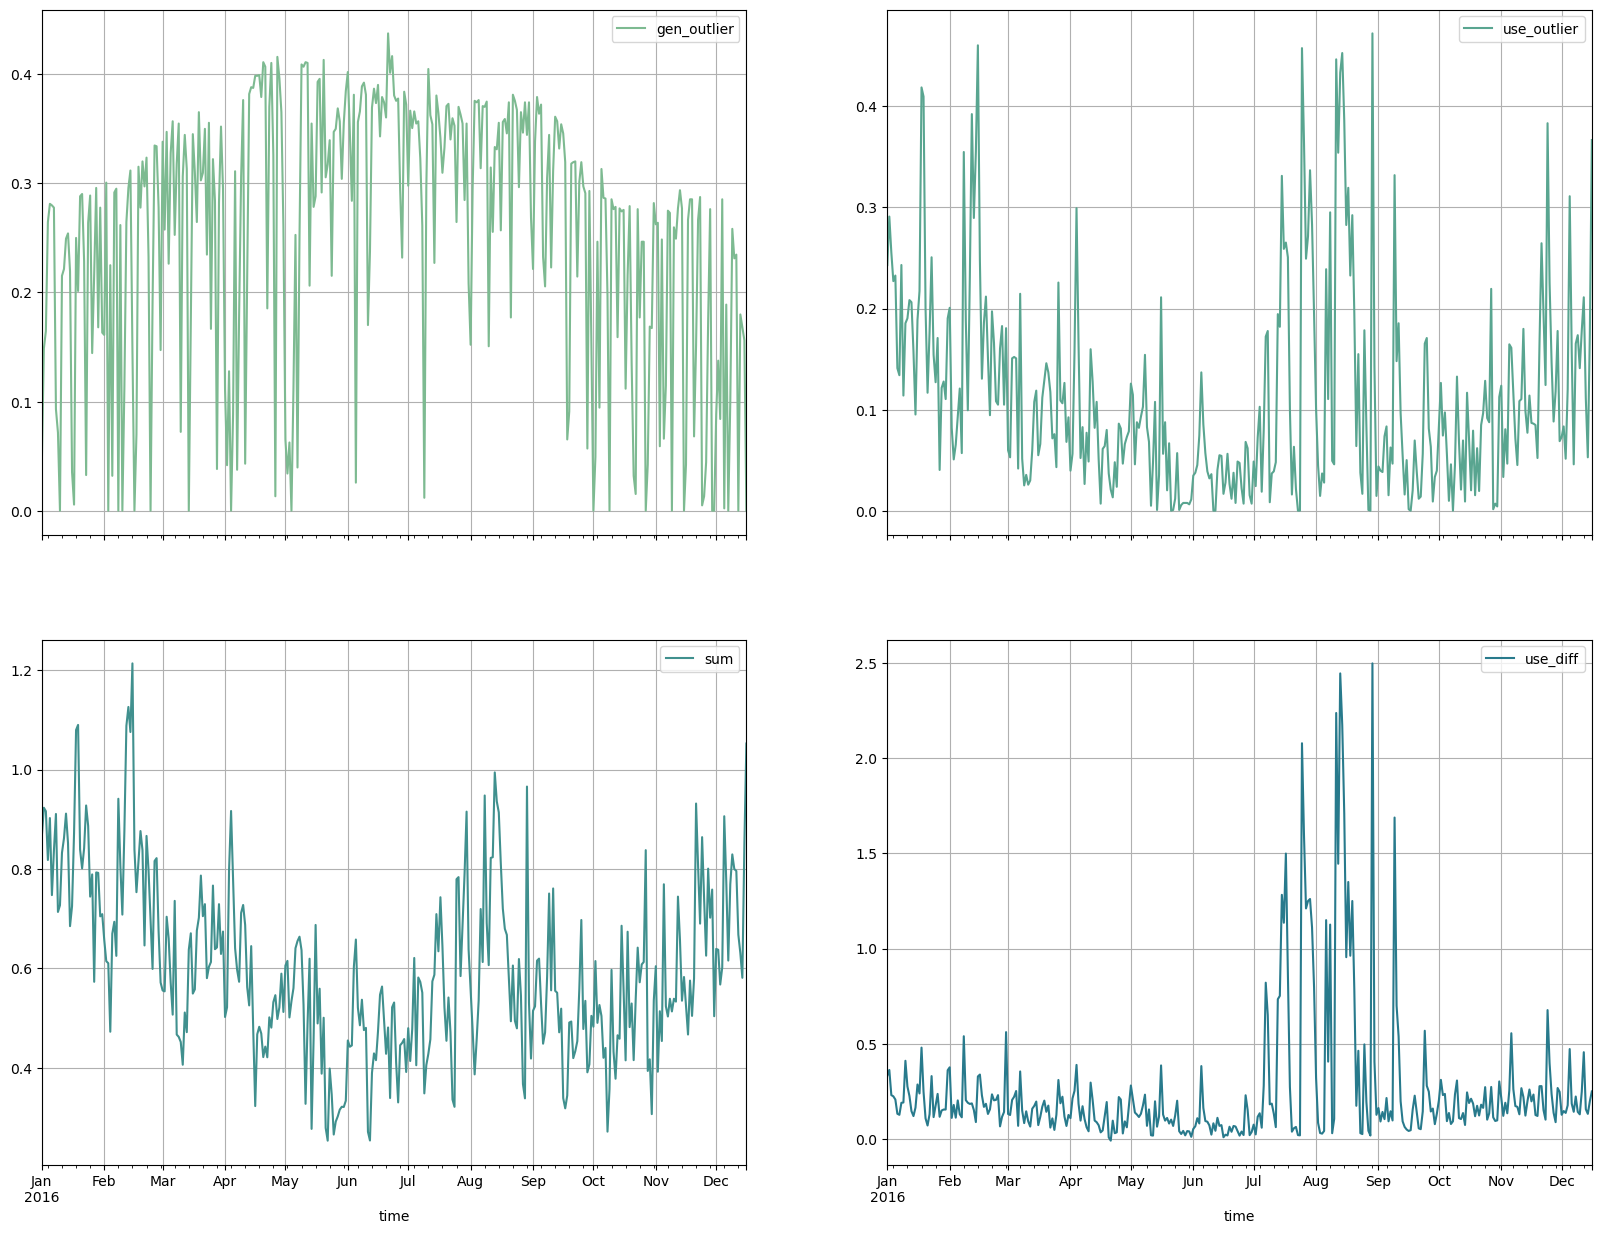

---------------------- WEEKLY ----------------------------


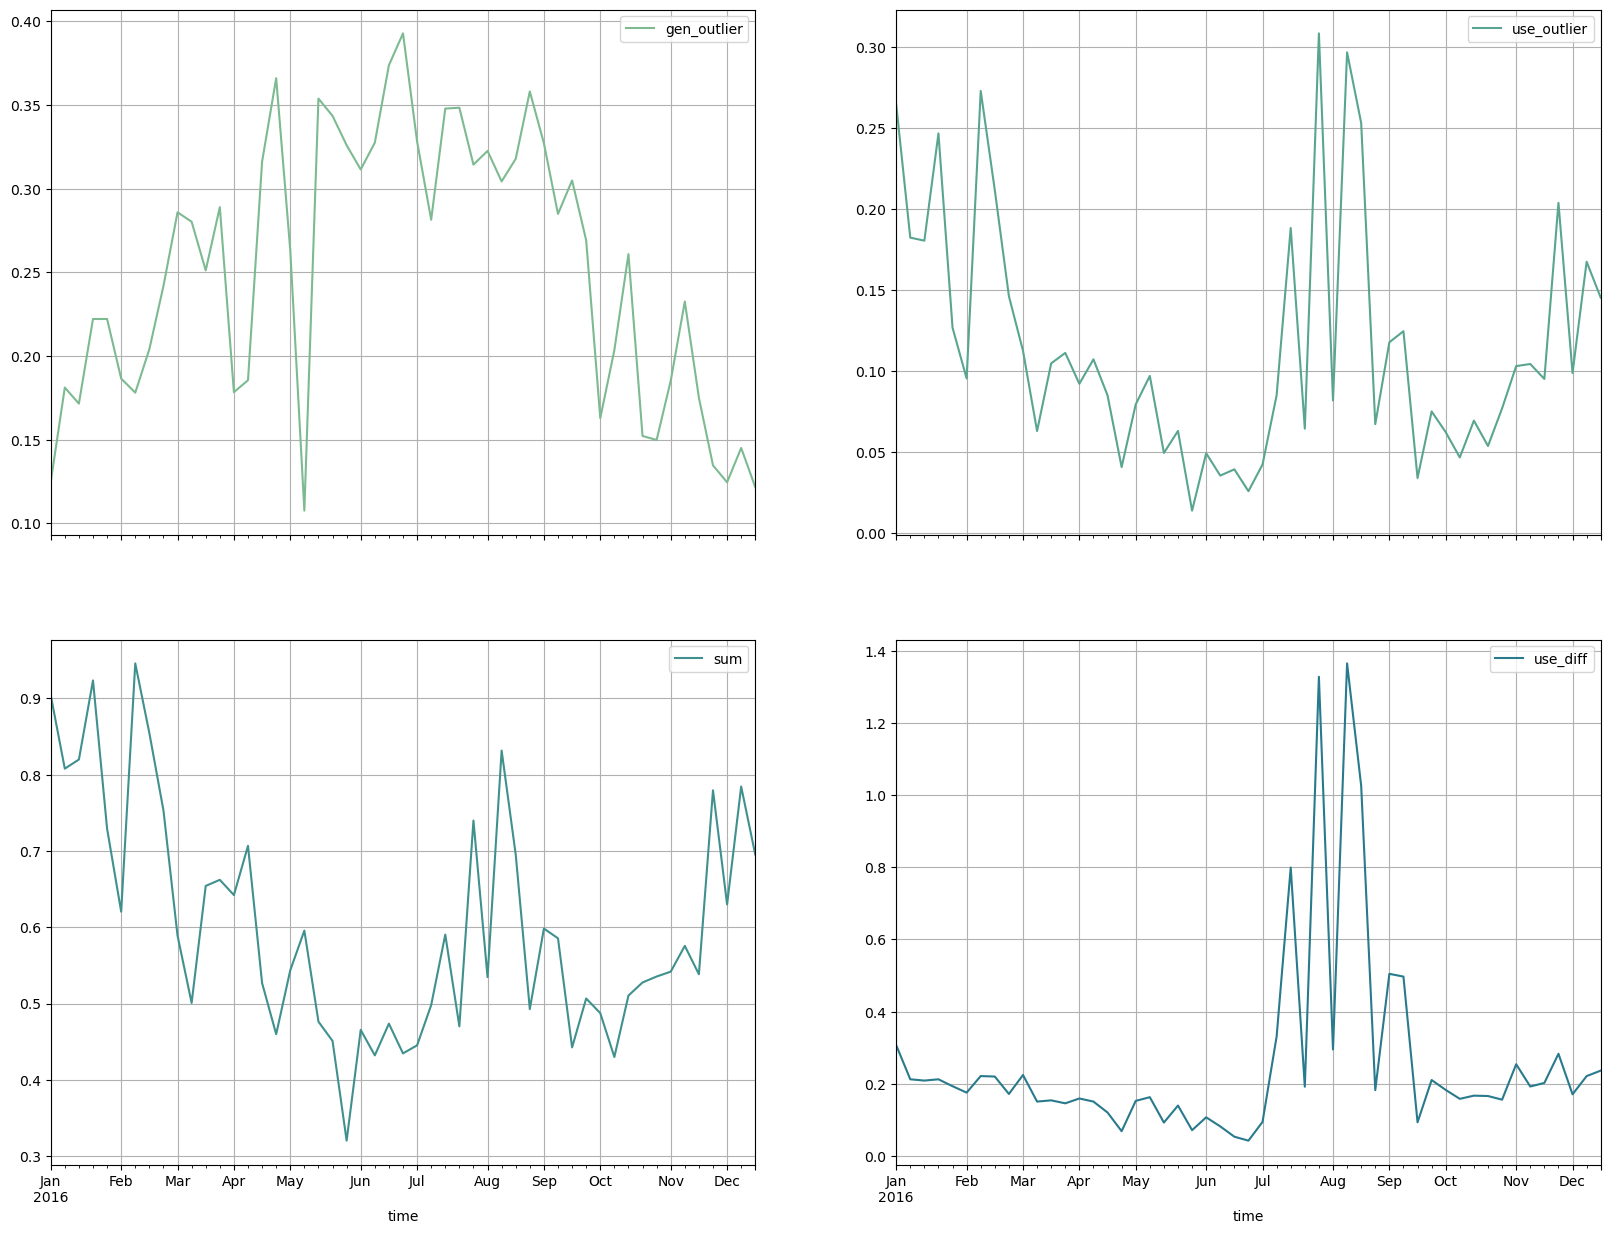

---------------------- MONTHLY ----------------------------


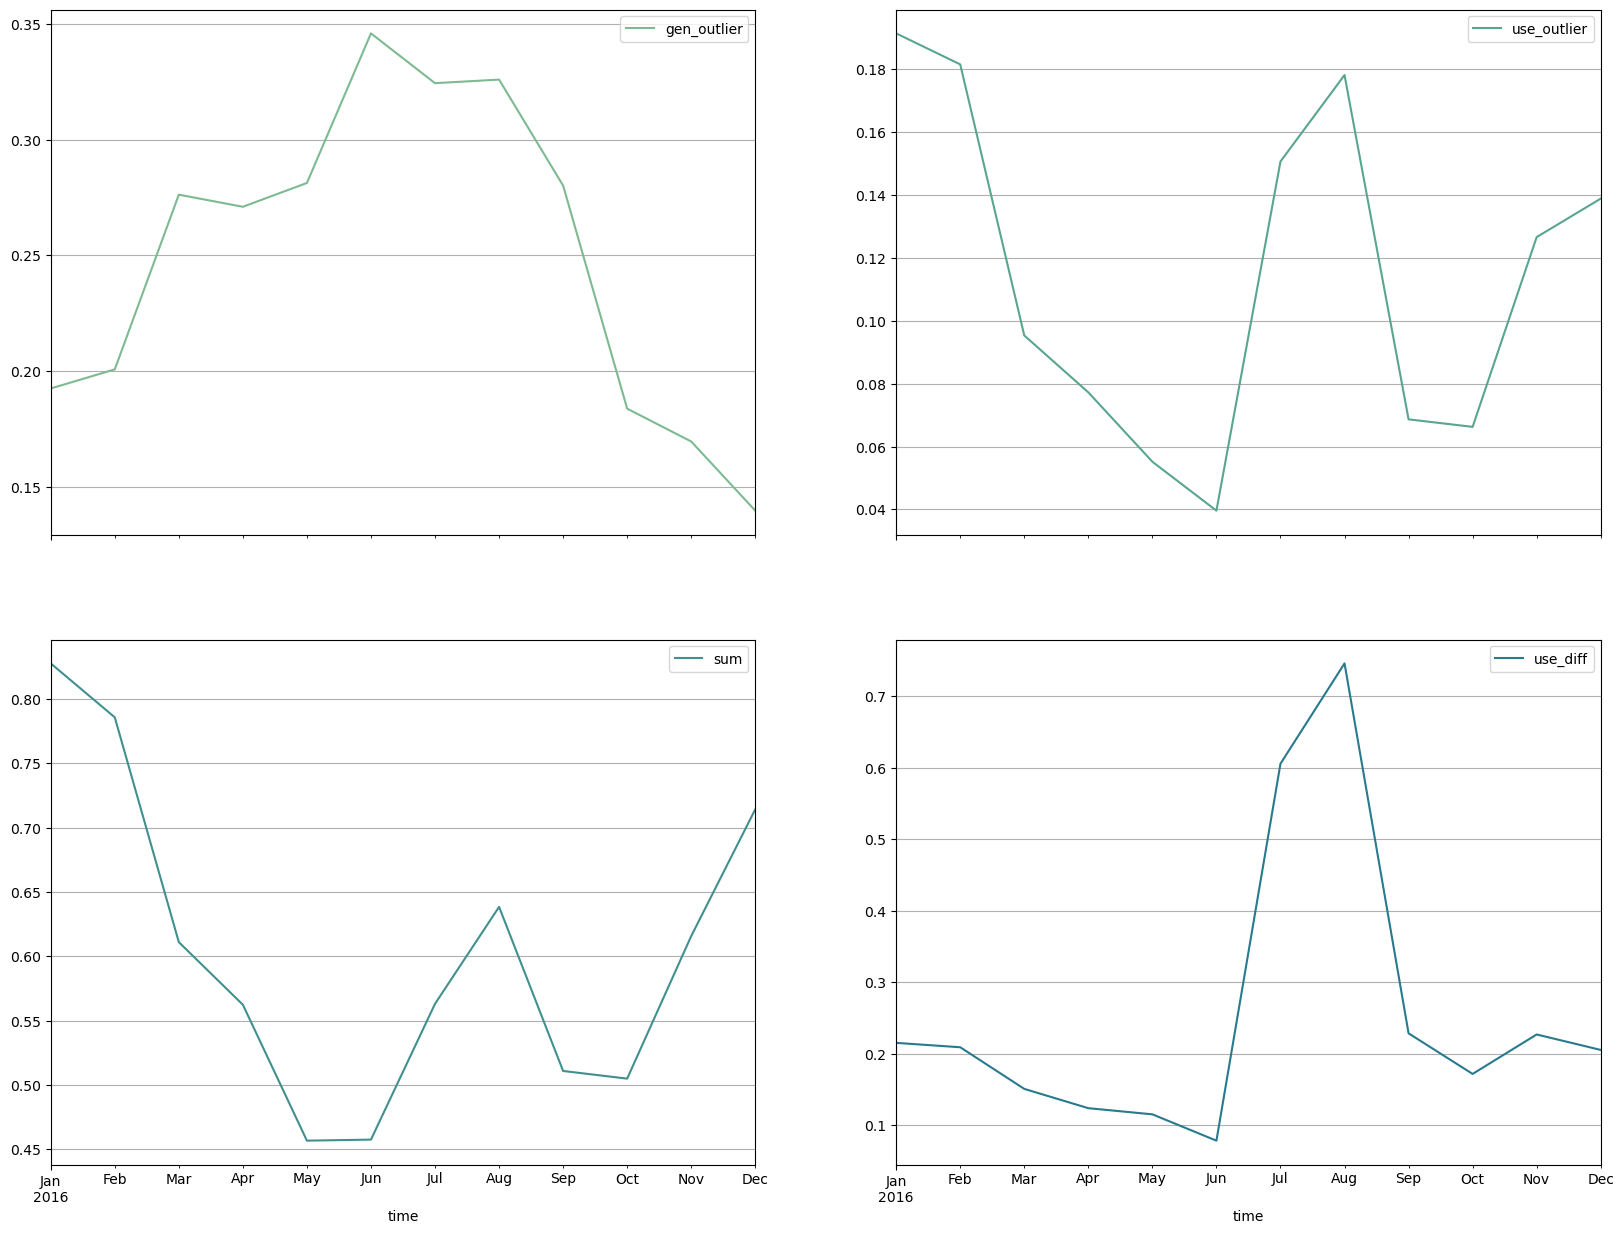

In [14]:
time_series_subplots(data,added_cols)

##### *Weather Columns*

---------------------- DAILY ----------------------------


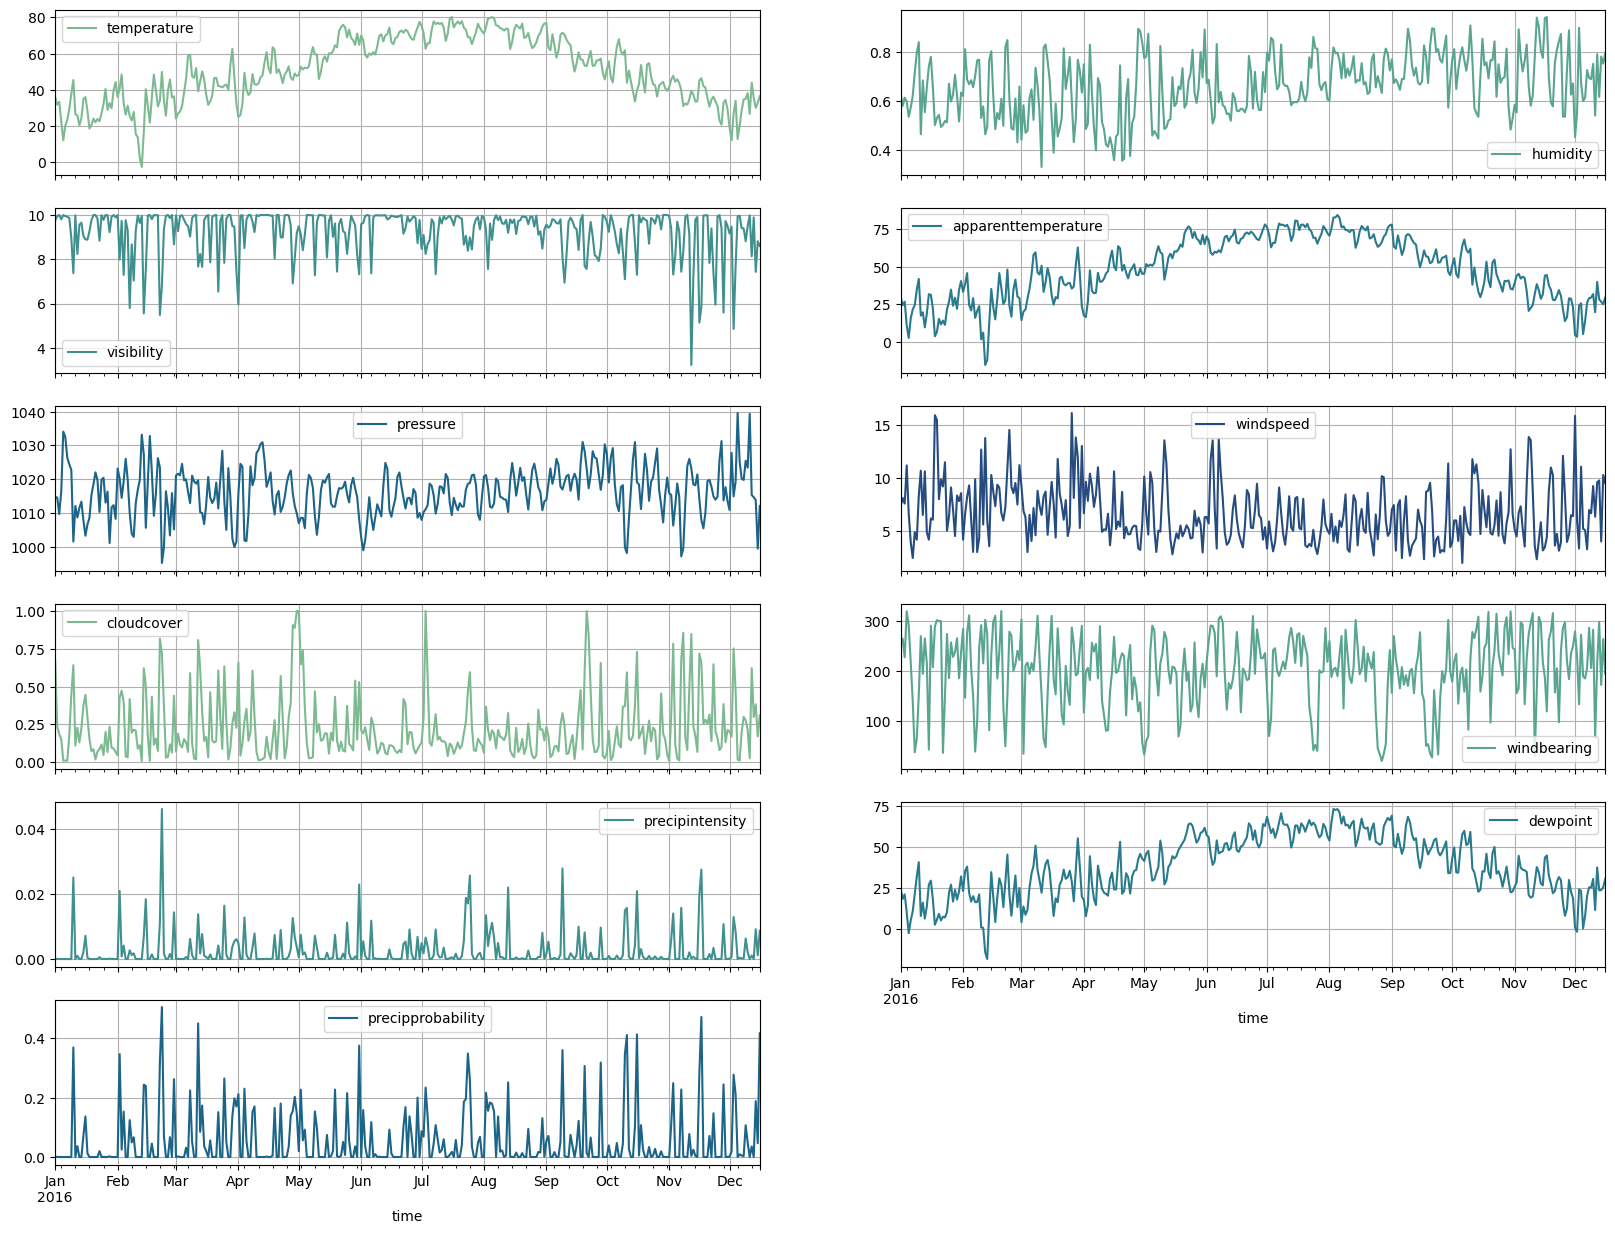

---------------------- WEEKLY ----------------------------


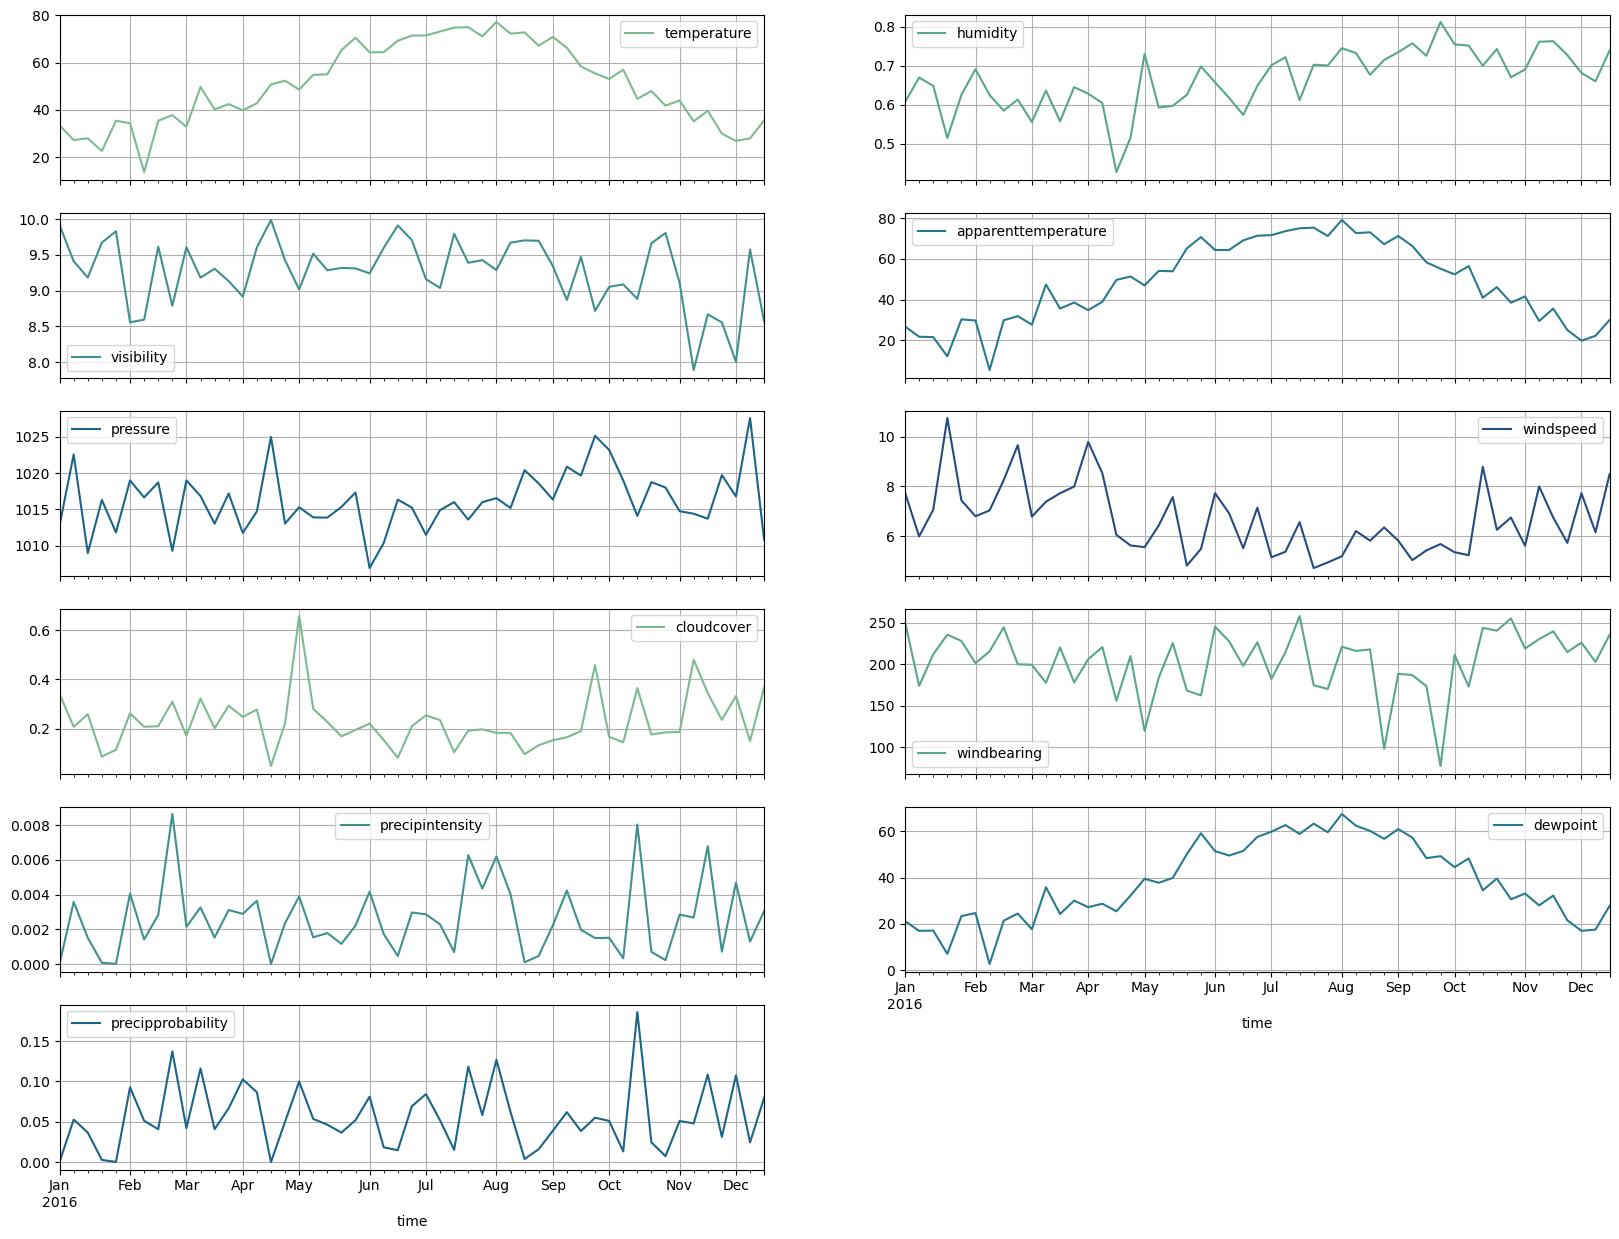

---------------------- MONTHLY ----------------------------


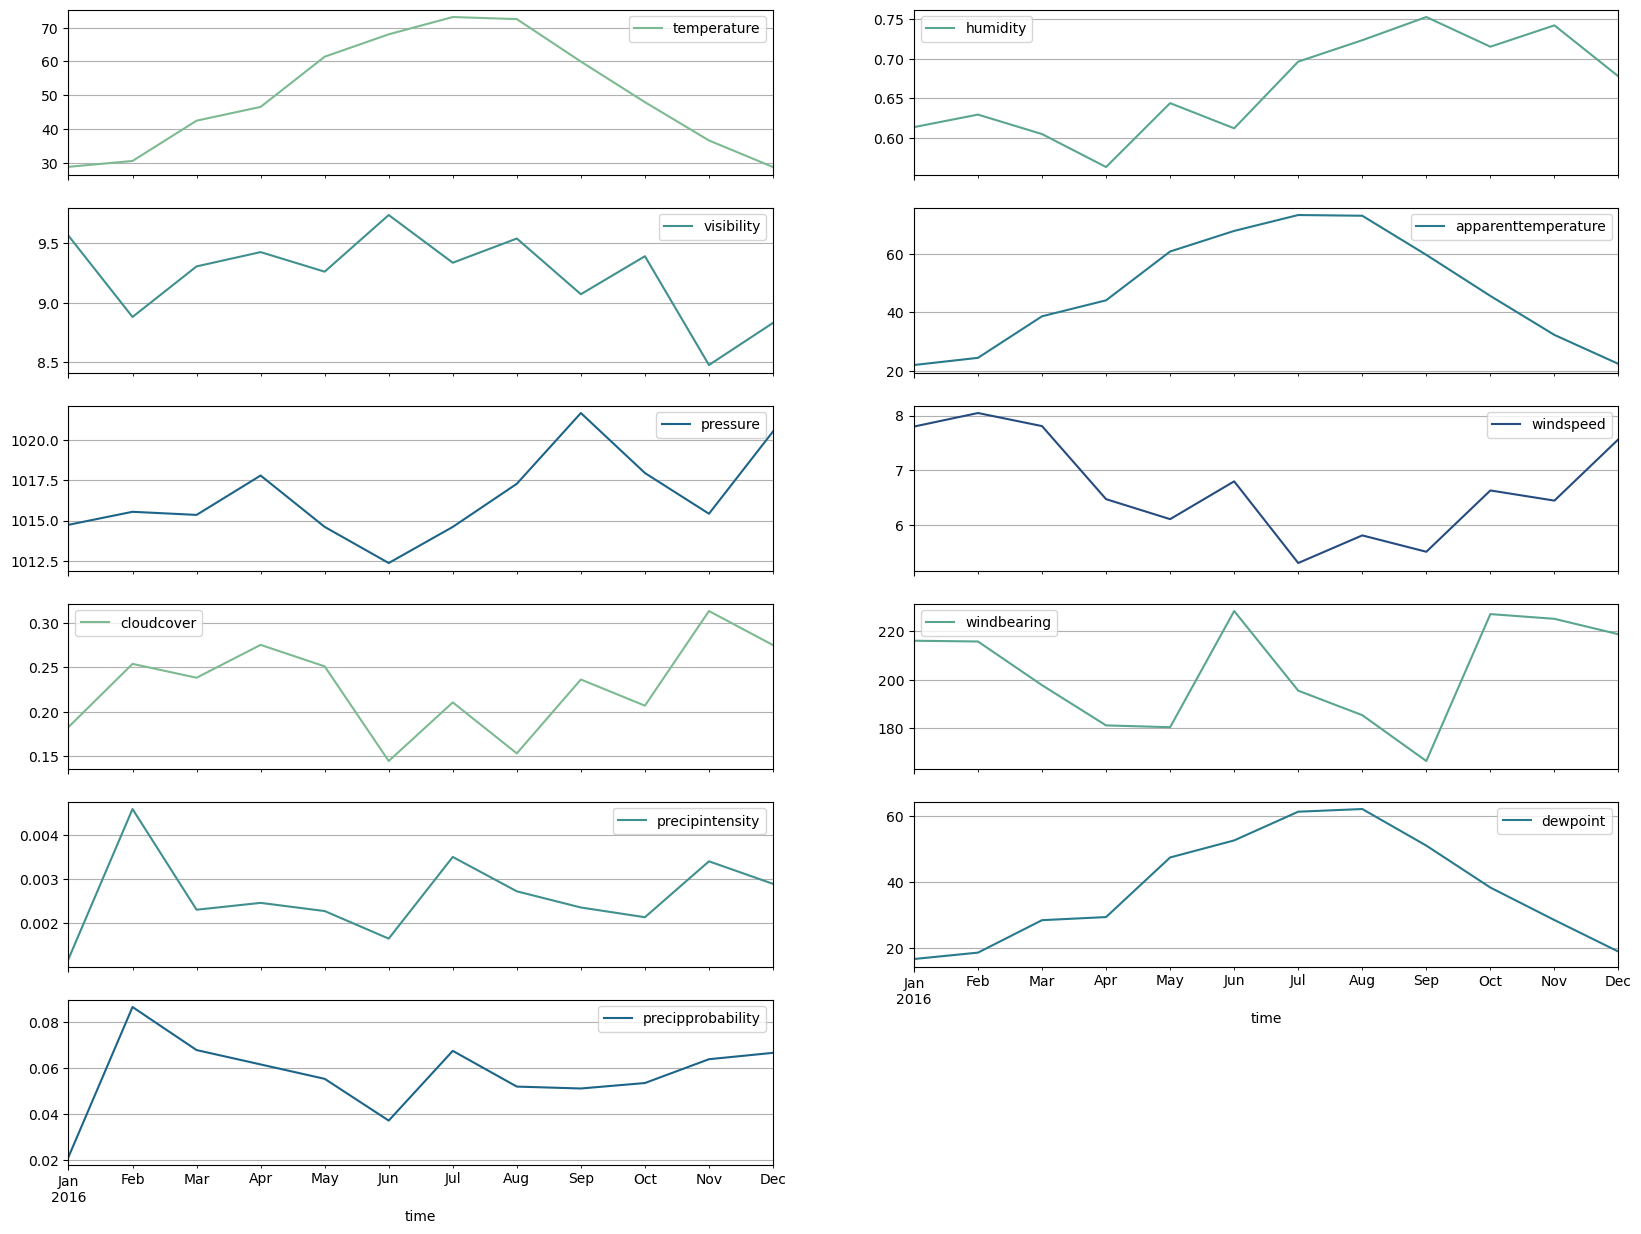

In [21]:
time_series_subplots(data,meteo_cols)

> ##### **Observations**
>
> * Total energy usage experiences significant growth during the summer months and to a lesser extent, in the winter.
> * Outliers exhibit uniform spikes both in summer and winter.
> * Usage difference contributes significantly to summer energy usage and appears to be related to outliers during the summer months specifically. It does not show a significant relation with outliers in other months.
> * The energy resulting from the sum of all devices is higher in winter. Although it increases in summer, the rise is slight.
Consumption in refrigeration devices spikes during summer.
> * Furnace consumption is higher in winter.
>
>
>

> ### **Conclusions and further goals**
>
> After conducting an exploratory analysis of energy consumption patterns and their relationship with the meteorological variables available in the dataset, I have arrived at the following conclusions:
>
> * Consumption patterns of specific devices are influenced by seasonal variations and certain weather variables.
> * The disparity between the total energy usage and the sum of device consumption correlates strongly with the presence of outliers during periods of peak consumption. Furthermore, these outliers appear to account for a significant proportion of overall energy consumption.
> 
>This underscores the importance of **proactively identifying such outliers to optimize and prevent unnecessary expenditure**. To address this, I propose the following project steps:
> 
> 1. Develop an **autoregressive model** capable of accurately predicting total energy consumption in time.
> 2. **Enhance this model performance** by incorporating and engineering relevant meteorological features, specific device data, and fine-tuning parameters.
> 3. Implement **anomaly detection algorithms** to identify unusual consumption patterns and optimize user energy usage.
> 4. Continuously **refine project objectives** based on insights gained from ongoing data analysis.
> 
> 
> 